# DLProfile Example using Imagenet Application

## Set imports and neccessary environment variables

In [1]:
import pathlib
import os
import sys
import matplotlib.pyplot as plt
import warnings
import pprint
import pandas as pd
import tensorflow as tf

In [2]:
DLPOFILE_DIR="{}".format(pathlib.Path(os.getcwd()).parent.absolute())
sys.path.insert(0, DLPOFILE_DIR)
warnings.filterwarnings('ignore')

In [3]:
os.environ["DARSHAN_DIR"] = "/soft/perftools/darshan/darshan-3.1.8"
os.environ["DLPROFILE_DIR"] = DLPOFILE_DIR

### Formatting

In [4]:
pp = pprint.PrettyPrinter(indent=1)
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

## Create instrance of DL Profile and load the darshan file

In [5]:
from src.dlprofile import DLProfile

In [6]:
profile = DLProfile()

In [7]:
DATAPATH_INCLUDES = []
status = profile.Load("/home/dhari/darshan-logs/apps/imagenet/imagenet_run1_p8.darshan", data_paths_include=DATAPATH_INCLUDES)
if status:
    print("Darshan Trace loaded Successfully!")
else:
    print("Darshan Trace load Failed!")
    print(profile._error_str())

Loaded Pre-processed DXT from file: /tmp/temp_analysis/imagenet_run1_p8_io_df.csv
Loaded Pre-processed Pattern file: /tmp/temp_analysis/imagenet_run1_p8_pattern.json
Darshan Trace loaded Successfully!


## Use Profile object to analyze the darshan I/O trace.

### Verify if object works

The GetDXTAsDF() function enables users to perform analysis 

In [8]:
pd.set_option('display.max_colwidth', -1)
df = profile.GetDXTAsDF()
pp.pprint("Files used in the application")
pp.pprint(df['Filename'].unique().tolist())

'Files used in the application'
['/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00263-of-01024',
 '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00920-of-01024',
 '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00444-of-01024',
 '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00127-of-01024',
 '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00528-of-01024',
 '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00694-of-01024',
 '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00928-of-01024',
 '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00055-of-01024',
 '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00565-of-01024',
 '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00715-of-01024',
 '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00447-of-01024',
 '/projects/datascienc

### Collect the summary of the Application

In [9]:
summary = profile.GetSummary()
print("\n")
print(color.BOLD + "Data Access Summary (from Darshan):"+ color.END)
print("Total Job time\t\t\t:\t{:0.2f} seconds".format(summary['job_time']))
#FIXME: calculate time per rank and then take max across it.
print("Time spent in I/O\t\t:\t{:0.2f} seconds".format(summary['total_io_time']))
print("% Time spent in I/O\t\t:\t{:0.2f}%".format(float(summary['total_io_time'])*100/summary['job_time']))
print("Total Data Accessed\t\t:\t{:0.2f} GB".format(float(summary['total_io_bytes'])/1024.0/1024.0/1024.0))
print("Data Access Modules used\t:\t{}".format(summary['io_interface_used']))
print("Data Operations\t\t\t:\t{}".format(summary['io_operations_used']))
print("# of files used\t\t\t:\t{}".format(len(summary['files_used'])))
print("# of MPI Ranks\t\t\t:\t{:0.0f} ranks".format(summary['num_ranks']))
      
print(color.UNDERLINE + "Data Transfer size:"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} bytes and {:0.0f} bytes".format(summary['data_transfer_size']['min'],summary['data_transfer_size']['max']))
print("\tAverage\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['mean']))
print("\tMedian\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['median']))
      
print(color.UNDERLINE + "Data Transfer bandwidth: (per rank)"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} B/s and {:0.0f} MB/s".format(summary['data_transfer_bandwidth']['min'],summary['data_transfer_bandwidth']['max']/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['mean']/1024.0/1024.0))
print("\tMedian\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['median']/1024.0/1024.0))
      
print(color.UNDERLINE + "Access Pattern:"+ color.END)
print("\tSequential\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['sequential'])/summary['access_pattern']['total_operations']*100))
print("\tConsecutive\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['consecutive'])/summary['access_pattern']['total_operations']*100))
#An I/O op issued at an offset greater than where the previous I/O op ended.
#An I/O op issued at the offset immediately after the end of the previous I/O

print("\n")
print(color.BOLD + "Files Summary:"+ color.END)
print("File Types\t\t\t:\t{}".format("tfrecord"))
print(color.UNDERLINE + "Dataset Size:"+ color.END)
print("\tTotal\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['total'])/1024.0/1024.0/1024.0))
print("\tMin,Max\t\t\t:\t{:0.3f} GB and {:0.3f} GB".format(float(summary['file_used_summary']['size']['min'])/1024.0/1024.0/1024.0,float(summary['file_used_summary']['size']['max'])/1024.0/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['mean'])/1024.0/1024.0/1024.0))



Data Access Summary (from Darshan):
Total Job time			:	1444.00 seconds
Time spent in I/O		:	35.67 seconds
% Time spent in I/O		:	2.47%
Total Data Accessed		:	12.09 GB
Data Access Modules used	:	['X_POSIX']
Data Operations			:	['read']
# of files used			:	276
# of MPI Ranks			:	8 ranks
Data Transfer size:
	Min,Max			:	0 bytes and 262144 bytes
	Average			:	261062 bytes
	Median			:	262144 bytes
Data Transfer bandwidth: (per rank)
	Min,Max			:	0 B/s and 2500 MB/s
	Average			:	880 MB/s
	Median			:	833 MB/s
Access Pattern:
	Sequential		:	nan%
	Consecutive		:	nan%


Files Summary:
File Types			:	tfrecord
Dataset Size:
	Total			:	37.097 GB
	Min,Max			:	0.124 GB and 0.147 GB
	Average			:	0.134 GB


In [10]:
pp.pprint("Job time : {} seconds".format(profile.GetJobTime()))

'Job time : 1444.0 seconds'


In [11]:
pp.pprint("Time spent by application on I/O: {} seconds".format(profile.GetIOTime()))

'Time spent by application on I/O: 235.42650000000356 seconds'


### I/O time spent on each file

In [12]:
for file in df['Filename'].unique():
    print("I/O time for file {}: {:0.2f} secs".format(file,profile.GetIOTime(filepath=file)))

I/O time for file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00263-of-01024: 2.73 secs
I/O time for file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00920-of-01024: 0.43 secs
I/O time for file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00444-of-01024: 2.27 secs
I/O time for file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00127-of-01024: 2.42 secs
I/O time for file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00528-of-01024: 3.32 secs
I/O time for file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00694-of-01024: 2.72 secs
I/O time for file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00928-of-01024: 2.77 secs
I/O time for file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00055-of-01024: 2.86 secs
I/O time for file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00565-of-01024: 2.61 secs
I

I/O time for file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00886-of-01024: 0.08 secs
I/O time for file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00557-of-01024: 0.71 secs
I/O time for file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00524-of-01024: 0.51 secs
I/O time for file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00277-of-01024: 0.02 secs
I/O time for file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00142-of-01024: 0.68 secs
I/O time for file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00917-of-01024: 0.46 secs
I/O time for file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00808-of-01024: 0.50 secs
I/O time for file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00242-of-01024: 0.08 secs
I/O time for file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00718-of-01024: 0.09 secs
I

### I/O Time spent per rank

In [13]:
for rank in df['Rank'].unique():
    print("I/O time for rank {}: {:0.2f} seconds".format(rank,profile.GetIOTime(rank=rank)))

I/O time for rank 0: 35.67 seconds
I/O time for rank 1: 26.43 seconds
I/O time for rank 2: 31.65 seconds
I/O time for rank 3: 28.64 seconds
I/O time for rank 4: 25.40 seconds
I/O time for rank 5: 28.62 seconds
I/O time for rank 6: 27.39 seconds
I/O time for rank 7: 31.62 seconds


In [14]:
"Total I/O performed by application: {:0.2f} GB".format(float(profile.GetIOSize())/1024.0/1024.0/1024.0)

'Total I/O performed by application: 12.09 GB'

### I/O performed on each file

In [15]:
for file in df['Filename'].unique():
    print("I/O performed on file {}: {:0.2f} MB".format(file,float(profile.GetIOSize(filepath=file))/1024.0/1024.0))

I/O performed on file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00263-of-01024: 133.99 MB
I/O performed on file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00920-of-01024: 16.25 MB
I/O performed on file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00444-of-01024: 130.48 MB
I/O performed on file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00127-of-01024: 132.11 MB
I/O performed on file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00528-of-01024: 143.55 MB
I/O performed on file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00694-of-01024: 139.53 MB
I/O performed on file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00928-of-01024: 132.73 MB
I/O performed on file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00055-of-01024: 133.14 MB
I/O performed on file /projects/datascience/rzamora/data/imagenet/count.48.size.8

I/O performed on file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00442-of-01024: 15.50 MB
I/O performed on file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00722-of-01024: 0.50 MB
I/O performed on file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00950-of-01024: 0.25 MB
I/O performed on file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00559-of-01024: 0.25 MB
I/O performed on file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00886-of-01024: 0.25 MB
I/O performed on file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00557-of-01024: 16.50 MB
I/O performed on file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00524-of-01024: 17.50 MB
I/O performed on file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00277-of-01024: 0.25 MB
I/O performed on file /projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-0014

In [16]:
for rank in df['Rank'].unique():
    print("I/O performed by rank {}: {:0.2f} MB".format(rank, float(profile.GetIOSize(rank=rank))/1024.0/1024.0))

I/O performed by rank 0: 1512.34 MB
I/O performed by rank 1: 1524.77 MB
I/O performed by rank 2: 1552.49 MB
I/O performed by rank 3: 1560.19 MB
I/O performed by rank 4: 1545.73 MB
I/O performed by rank 5: 1552.50 MB
I/O performed by rank 6: 1565.04 MB
I/O performed by rank 7: 1563.91 MB


In [17]:
print("Size of dataset (bytes)")
pp.pprint(profile.GetFileSizes())

Size of dataset (bytes)
{'train-00001-of-01024': 141489460.0,
 'train-00008-of-01024': 139746222.0,
 'train-00022-of-01024': 141430681.0,
 'train-00024-of-01024': 136918974.0,
 'train-00027-of-01024': 149125498.0,
 'train-00031-of-01024': 141249276.0,
 'train-00033-of-01024': 139298005.0,
 'train-00035-of-01024': 151419061.0,
 'train-00037-of-01024': 141063940.0,
 'train-00038-of-01024': 144168054.0,
 'train-00040-of-01024': 141724996.0,
 'train-00046-of-01024': 143388688.0,
 'train-00048-of-01024': 141297841.0,
 'train-00051-of-01024': 145511429.0,
 'train-00055-of-01024': 139604458.0,
 'train-00057-of-01024': 143915104.0,
 'train-00058-of-01024': 141177465.0,
 'train-00063-of-01024': 146909798.0,
 'train-00067-of-01024': 143099221.0,
 'train-00068-of-01024': 144902254.0,
 'train-00071-of-01024': 149433313.0,
 'train-00073-of-01024': 143002797.0,
 'train-00075-of-01024': 150368294.0,
 'train-00082-of-01024': 137456846.0,
 'train-00083-of-01024': 144375949.0,
 'train-00087-of-01024': 1

### How application access data over time.

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df.csv


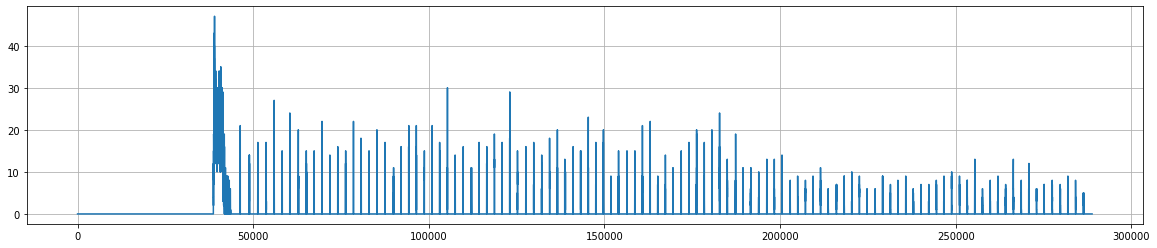

In [18]:
tl = profile.CreateIOTimeline()
plt.figure(figsize=(20,4))
plt.grid()
plt.plot(tl['time_step'], tl['operation_count']);

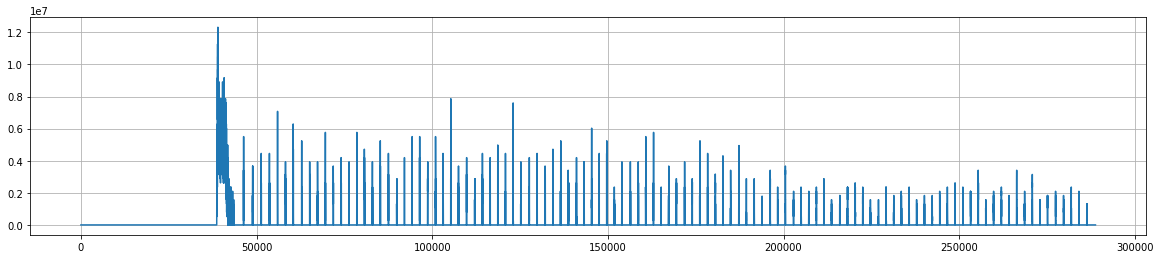

In [19]:
plt.figure(figsize=(20,4))
plt.grid()
plt.plot(tl['time_step'], tl['io_bytes']);

### How files are accessed over the duration of the Job.

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00263-of-01024.csv


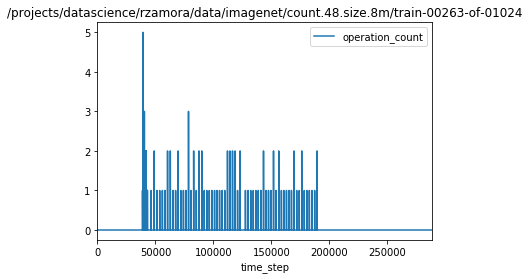

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00920-of-01024.csv


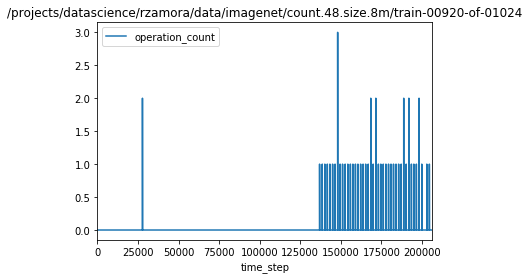

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00444-of-01024.csv


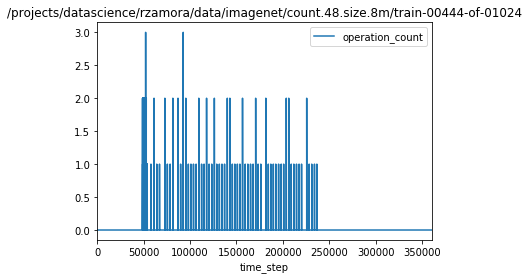

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00127-of-01024.csv


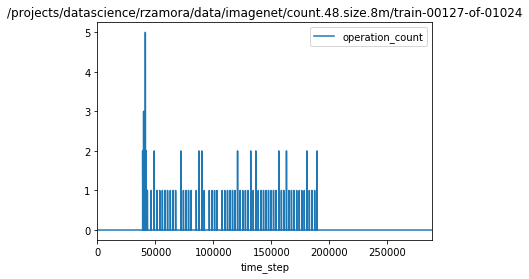

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00528-of-01024.csv


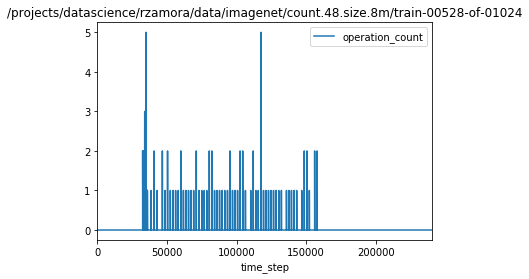

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00694-of-01024.csv


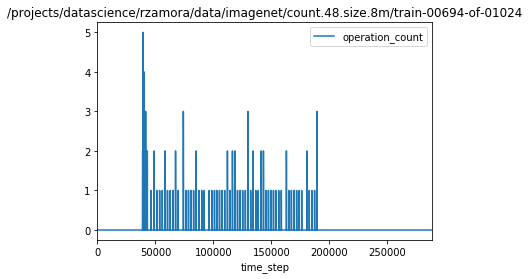

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00928-of-01024.csv


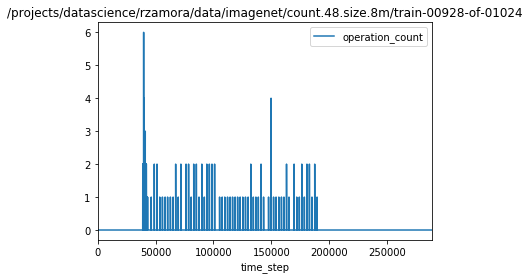

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00055-of-01024.csv


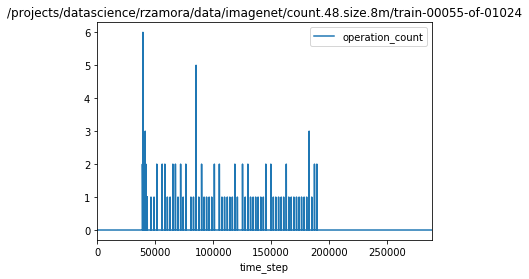

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00565-of-01024.csv


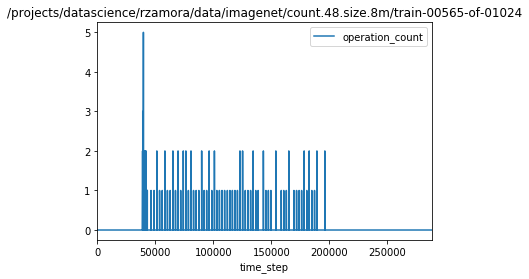

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00715-of-01024.csv


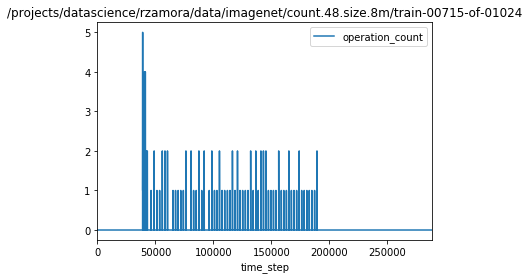

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00447-of-01024.csv


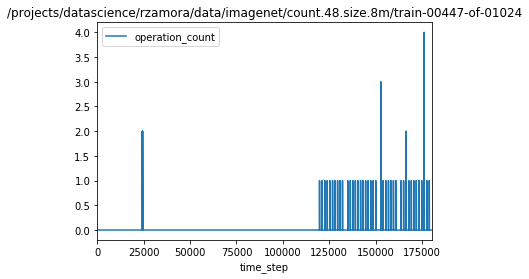

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00083-of-01024.csv


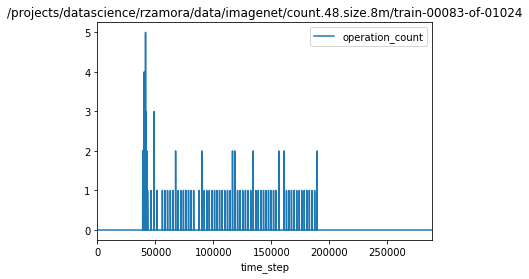

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00765-of-01024.csv


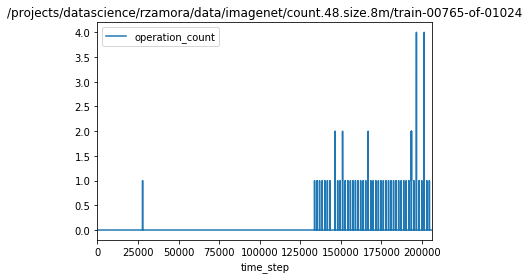

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00264-of-01024.csv


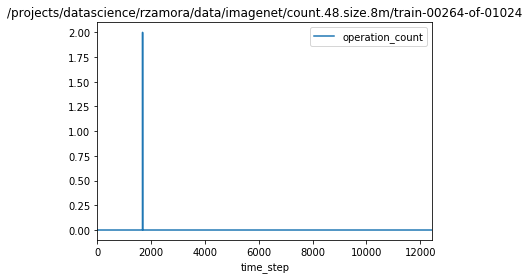

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00321-of-01024.csv


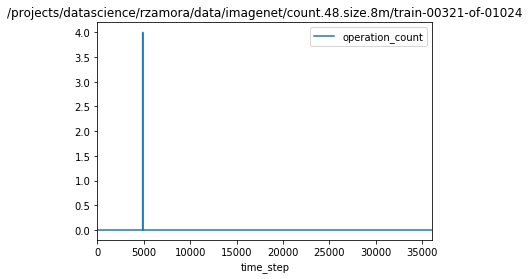

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00505-of-01024.csv


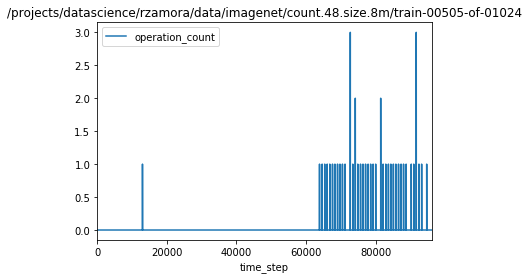

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00684-of-01024.csv


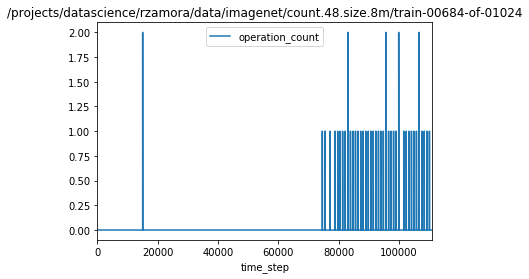

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00182-of-01024.csv


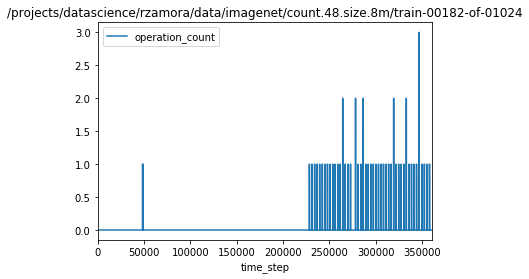

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00980-of-01024.csv


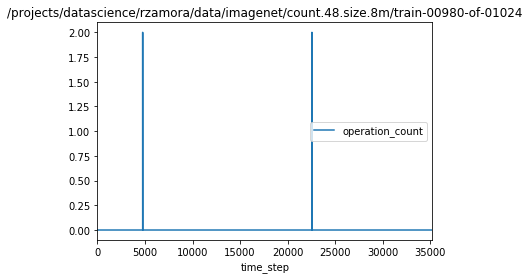

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00150-of-01024.csv


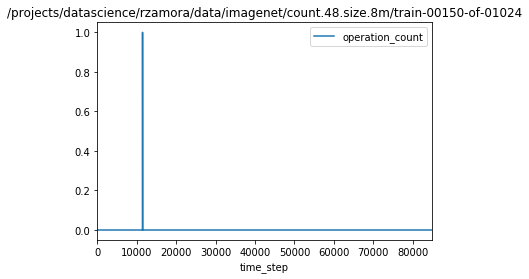

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00550-of-01024.csv


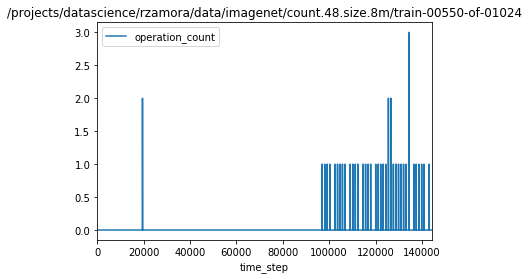

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00700-of-01024.csv


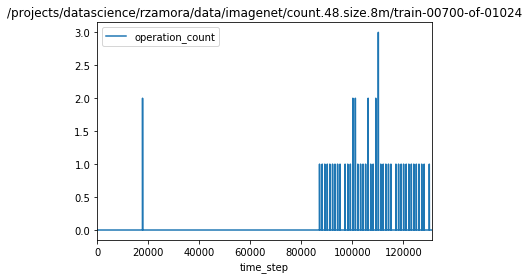

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00286-of-01024.csv


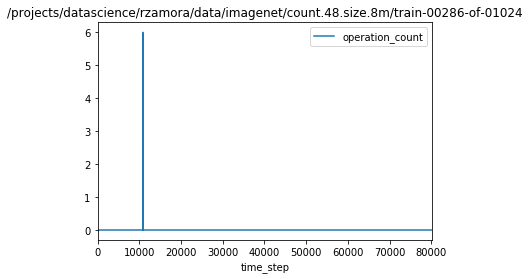

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00799-of-01024.csv


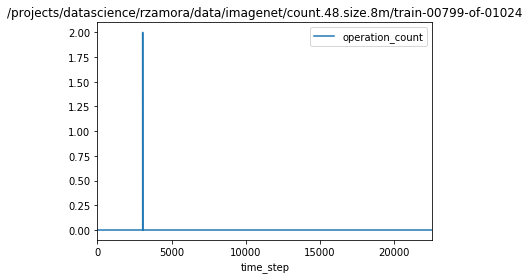

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00996-of-01024.csv


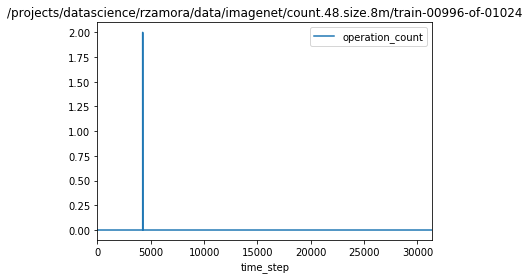

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00008-of-01024.csv


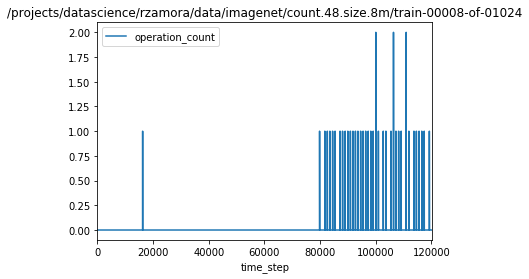

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00993-of-01024.csv


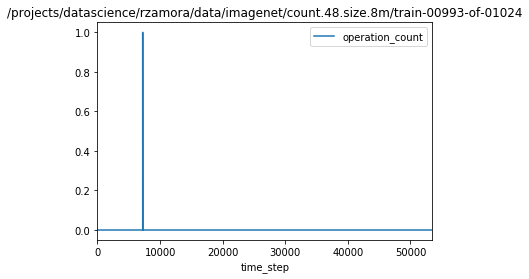

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00894-of-01024.csv


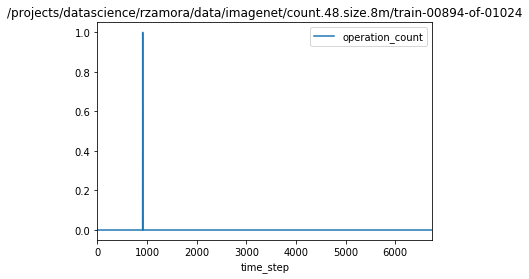

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00531-of-01024.csv


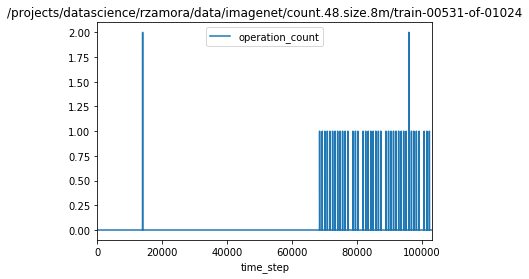

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00841-of-01024.csv


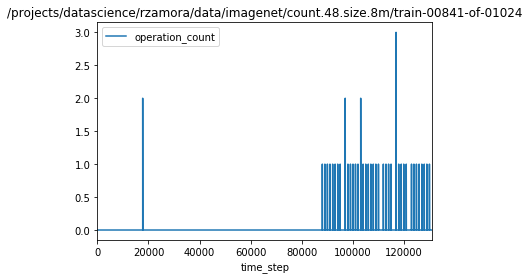

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00681-of-01024.csv


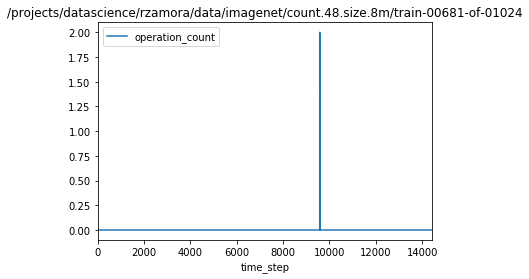

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00449-of-01024.csv


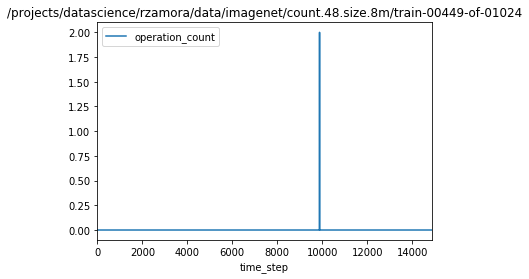

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-01006-of-01024.csv


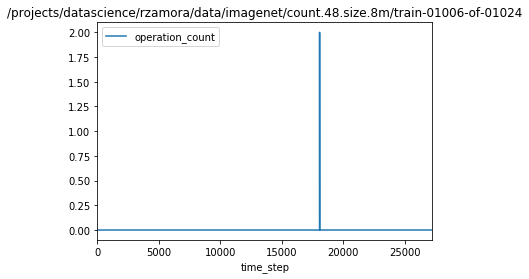

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00425-of-01024.csv


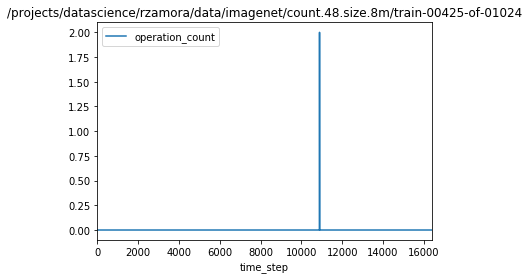

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00151-of-01024.csv


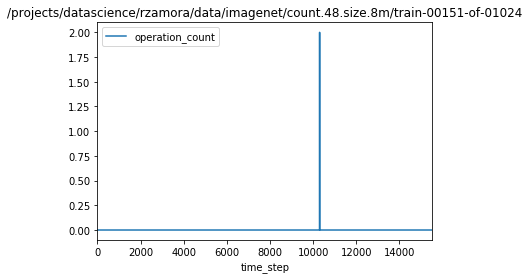

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00415-of-01024.csv


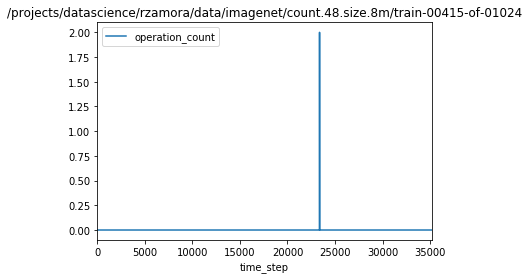

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00104-of-01024.csv


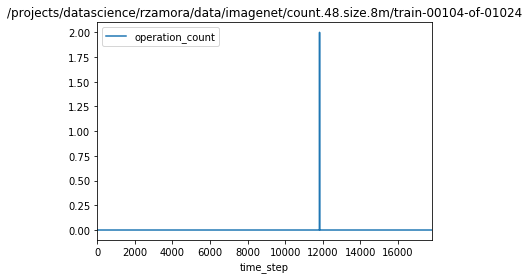

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00087-of-01024.csv


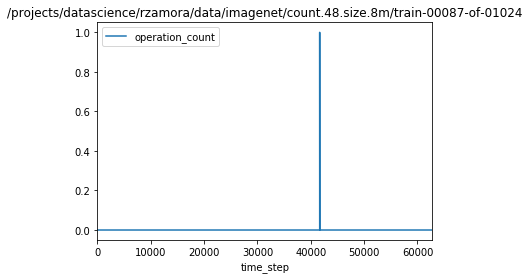

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00703-of-01024.csv


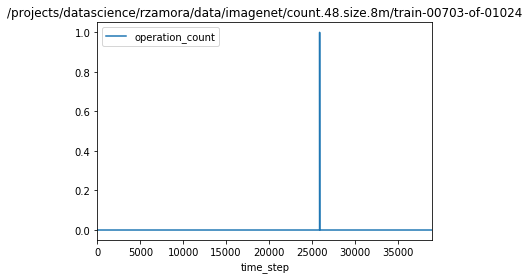

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00893-of-01024.csv


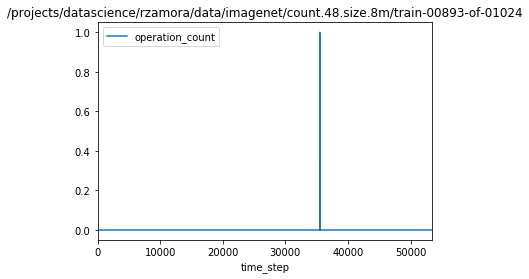

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00211-of-01024.csv


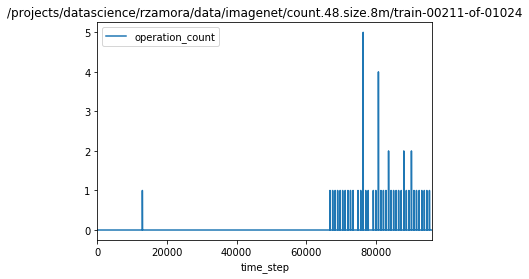

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00825-of-01024.csv


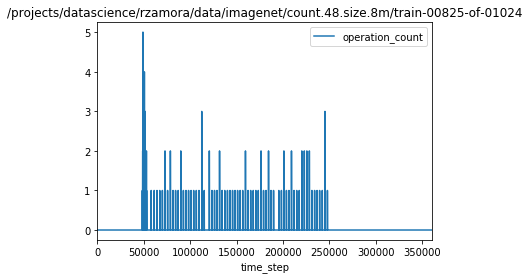

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00898-of-01024.csv


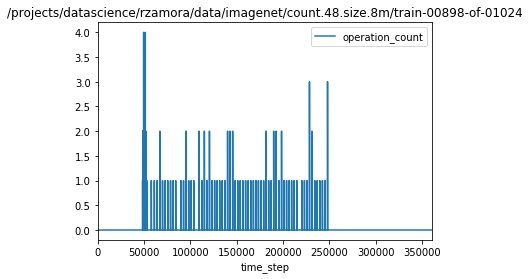

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00719-of-01024.csv


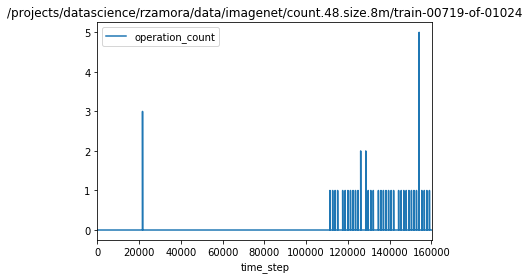

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00220-of-01024.csv


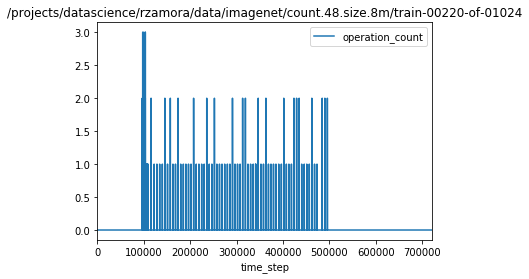

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00095-of-01024.csv


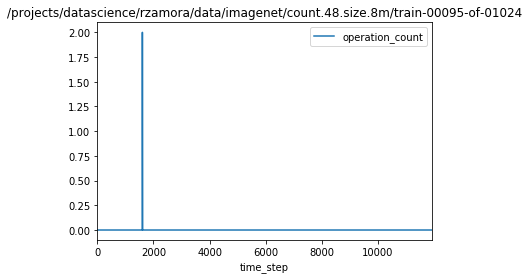

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00949-of-01024.csv


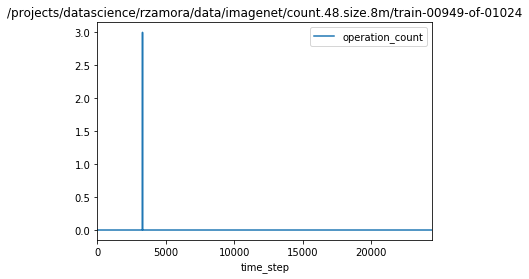

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00899-of-01024.csv


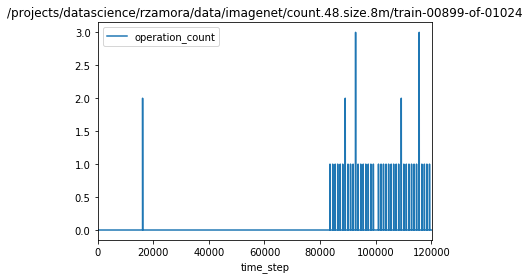

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-01021-of-01024.csv


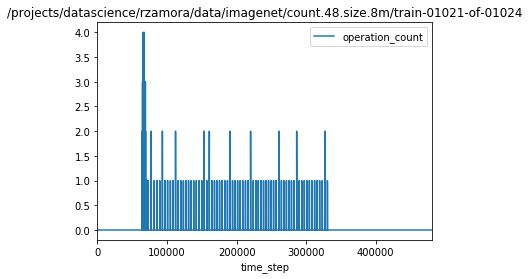

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00024-of-01024.csv


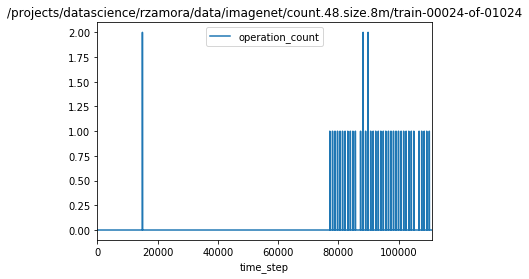

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00677-of-01024.csv


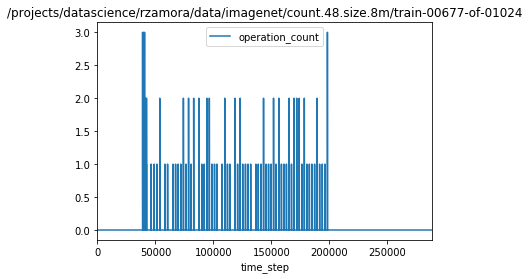

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00033-of-01024.csv


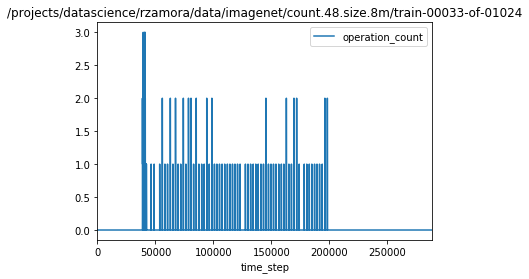

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00748-of-01024.csv


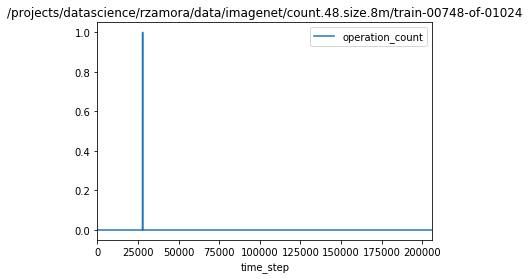

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00328-of-01024.csv


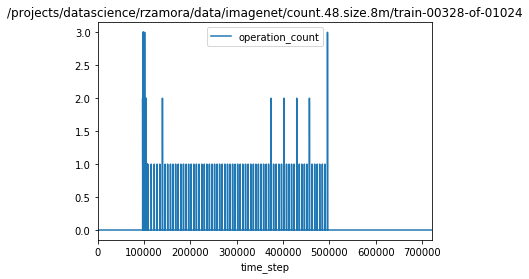

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00058-of-01024.csv


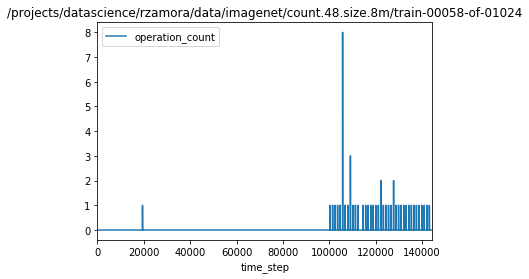

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00404-of-01024.csv


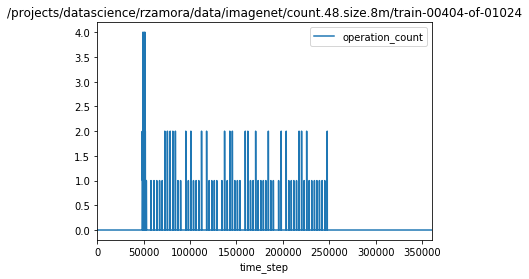

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00911-of-01024.csv


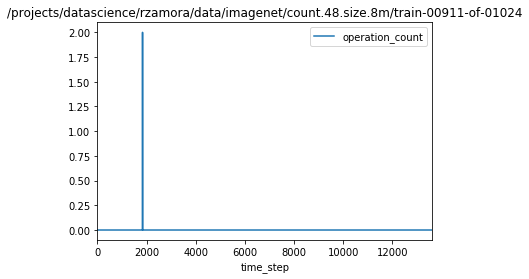

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00374-of-01024.csv


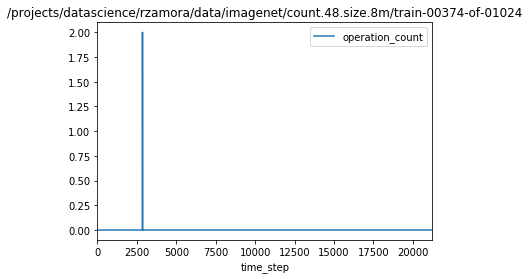

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00240-of-01024.csv


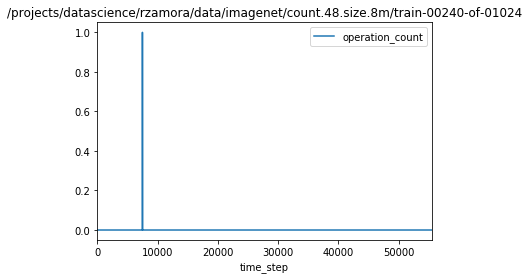

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00355-of-01024.csv


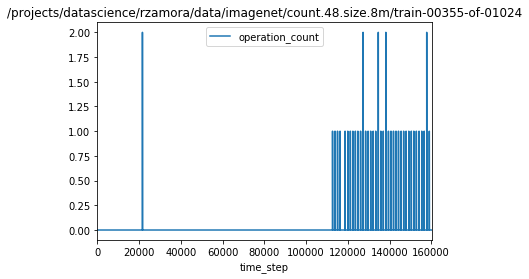

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00308-of-01024.csv


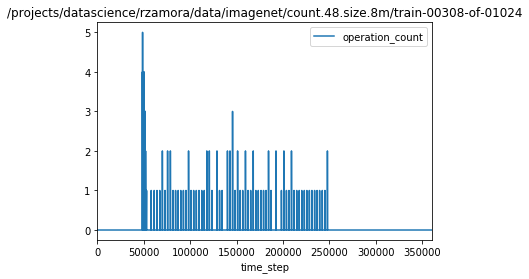

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00743-of-01024.csv


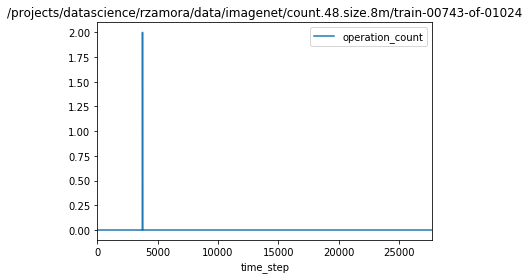

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00640-of-01024.csv


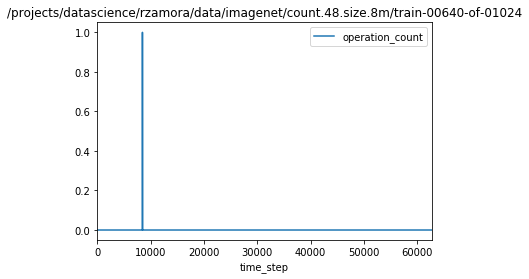

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00787-of-01024.csv


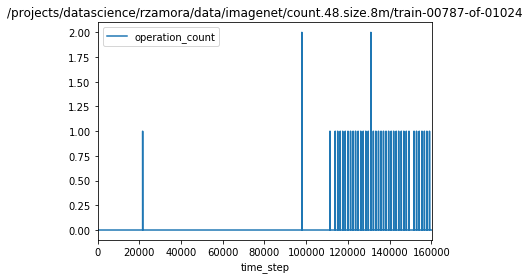

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00575-of-01024.csv


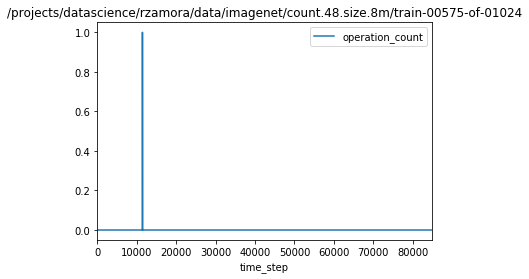

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00040-of-01024.csv


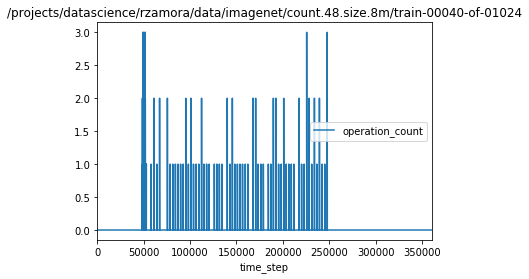

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00649-of-01024.csv


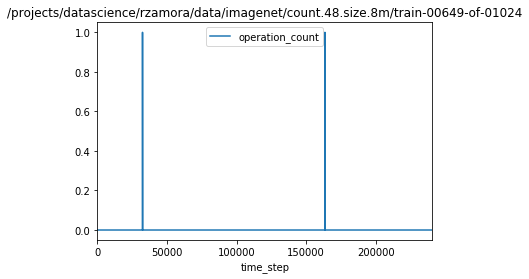

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00284-of-01024.csv


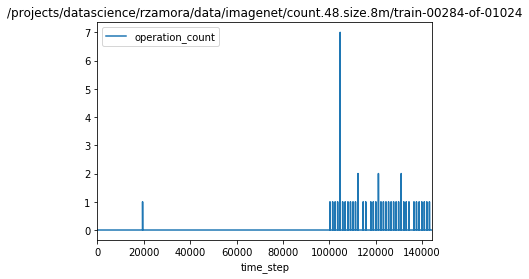

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00896-of-01024.csv


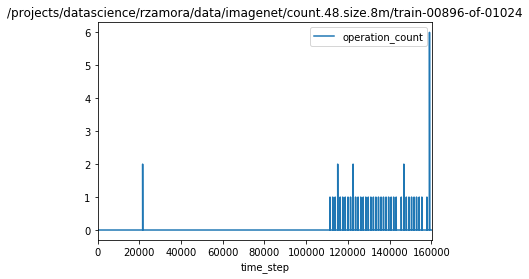

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00163-of-01024.csv


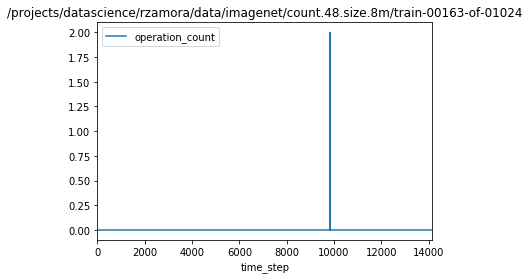

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00340-of-01024.csv


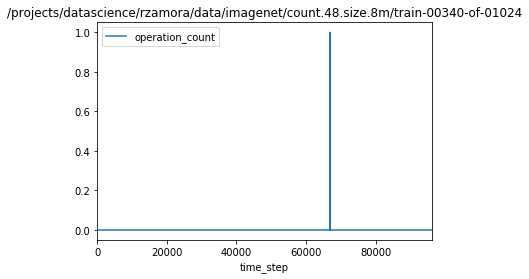

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00859-of-01024.csv


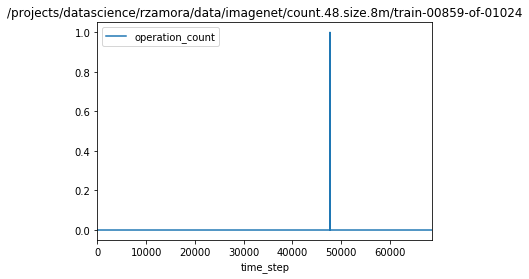

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00051-of-01024.csv


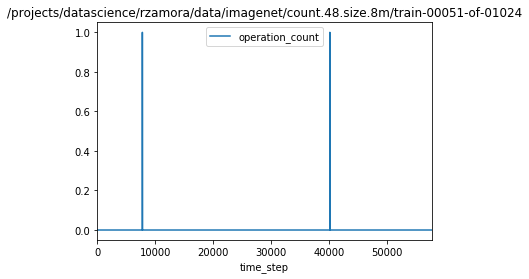

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00158-of-01024.csv


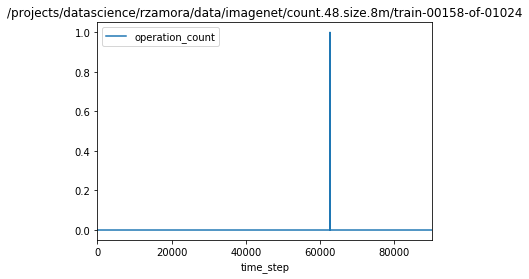

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00290-of-01024.csv


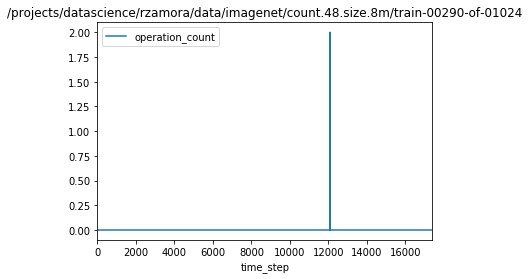

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00022-of-01024.csv


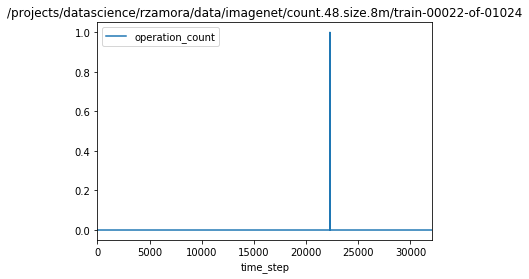

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00736-of-01024.csv


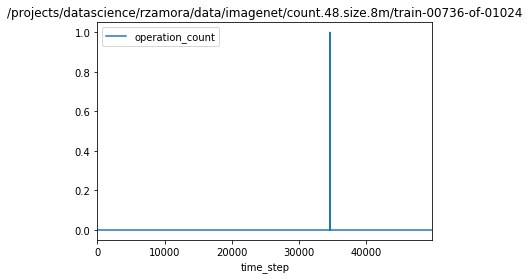

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00141-of-01024.csv


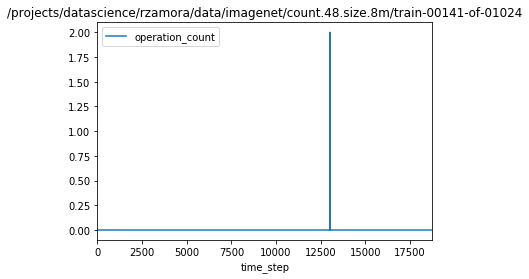

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00213-of-01024.csv


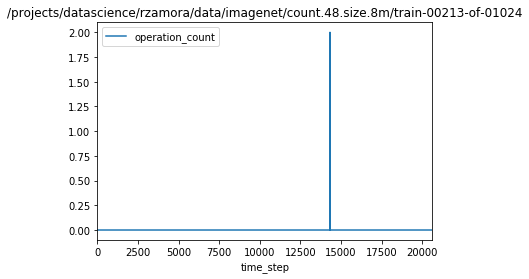

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00275-of-01024.csv


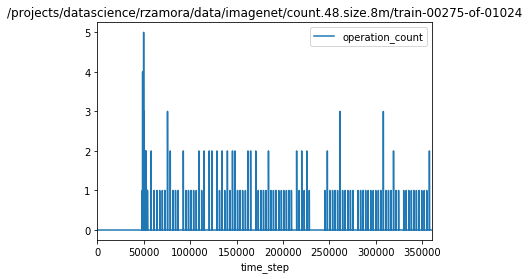

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00035-of-01024.csv


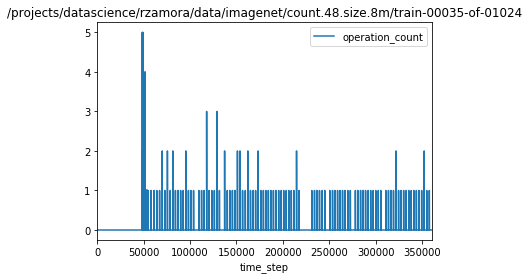

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00520-of-01024.csv


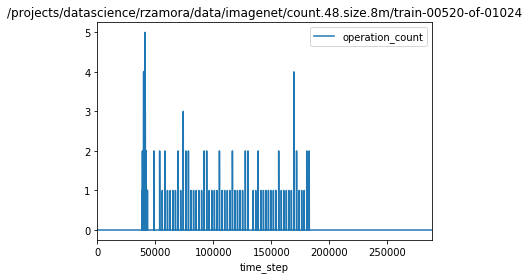

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00434-of-01024.csv


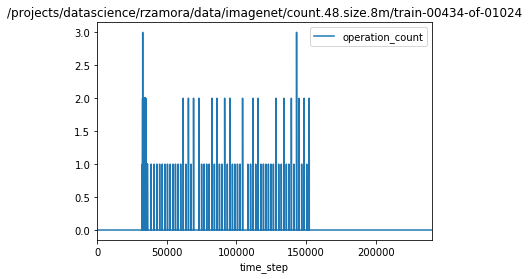

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00958-of-01024.csv


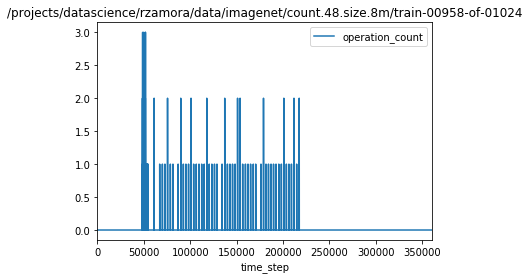

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00384-of-01024.csv


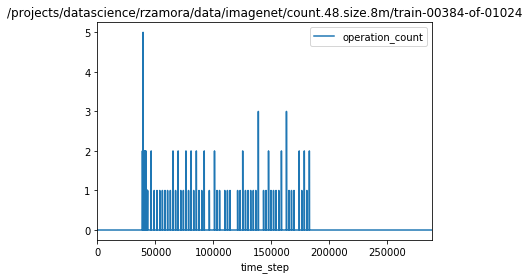

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00641-of-01024.csv


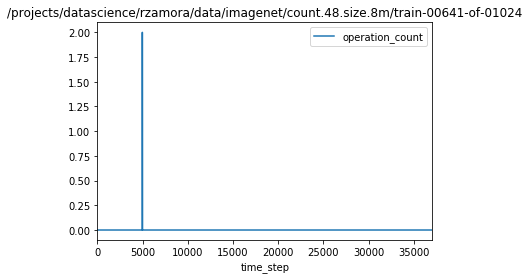

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00301-of-01024.csv


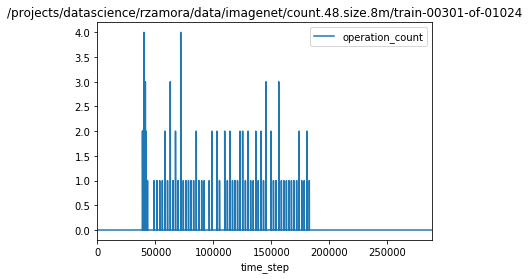

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00373-of-01024.csv


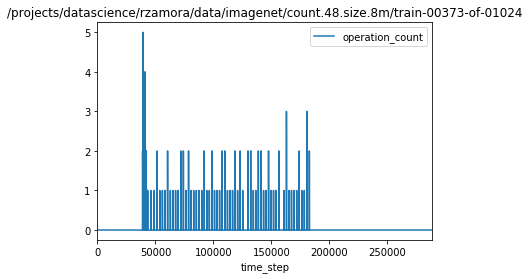

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00883-of-01024.csv


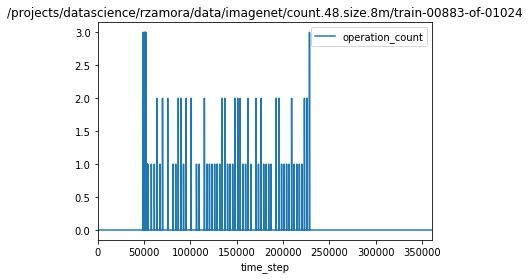

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00549-of-01024.csv


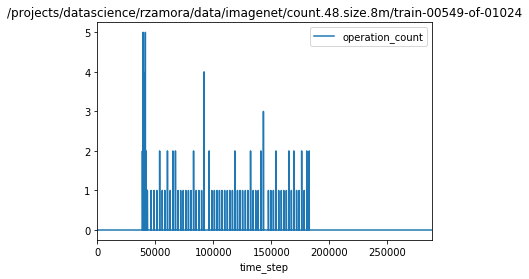

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00576-of-01024.csv


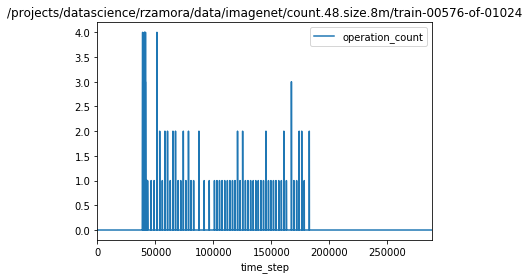

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00093-of-01024.csv


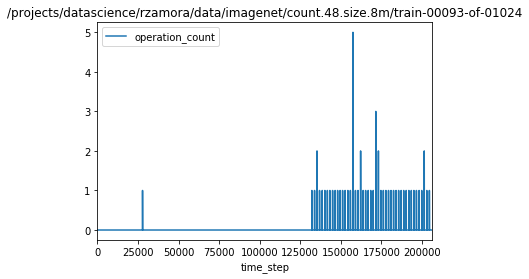

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00823-of-01024.csv


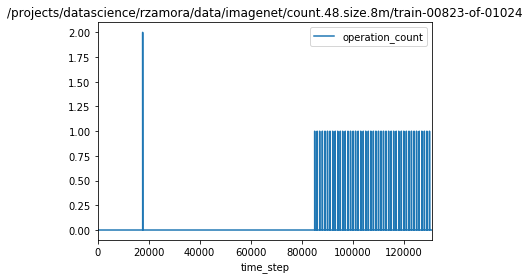

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00929-of-01024.csv


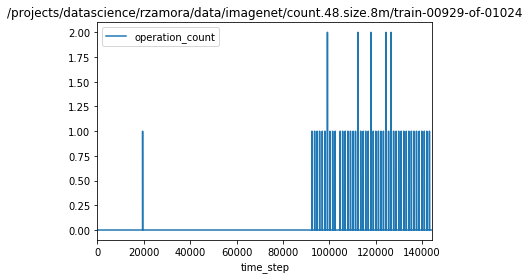

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00833-of-01024.csv


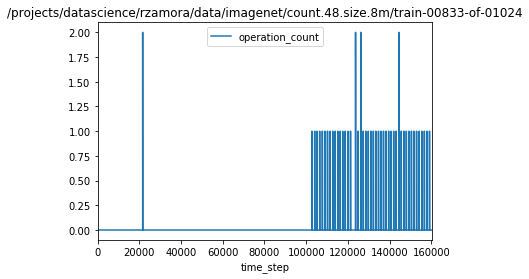

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00361-of-01024.csv


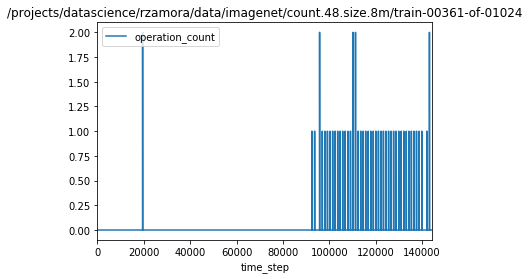

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00469-of-01024.csv


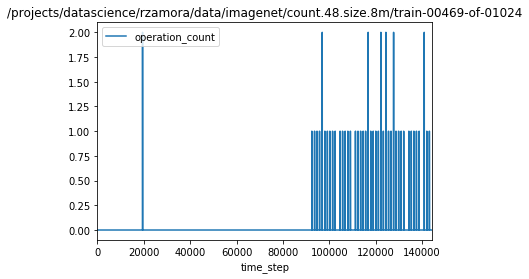

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00287-of-01024.csv


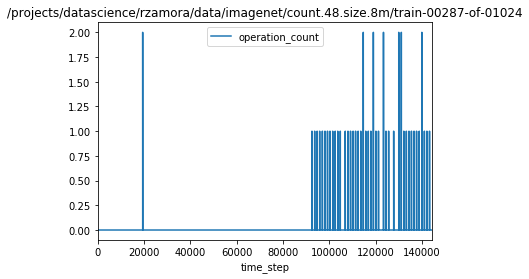

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00037-of-01024.csv


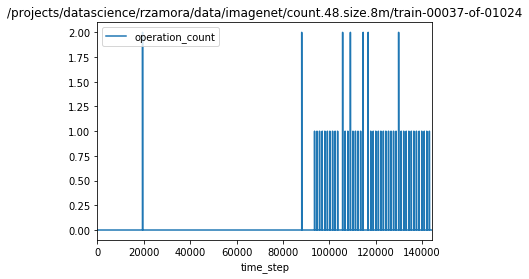

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00570-of-01024.csv


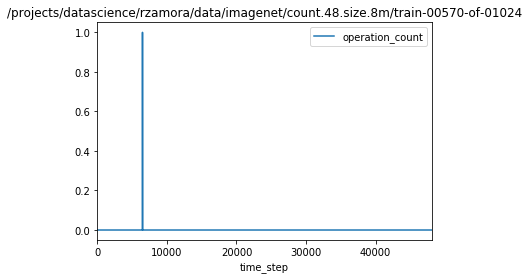

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00562-of-01024.csv


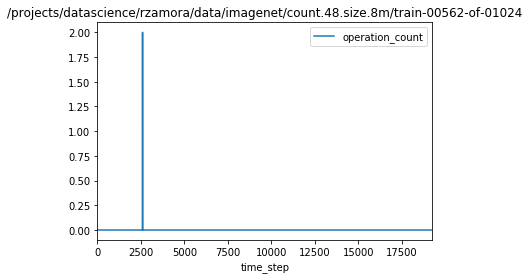

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00259-of-01024.csv


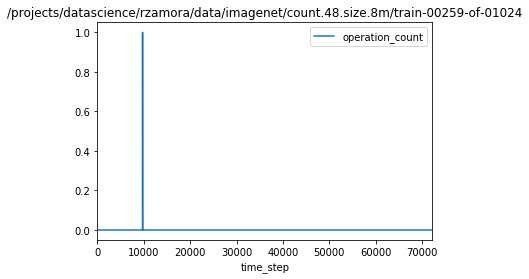

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00105-of-01024.csv


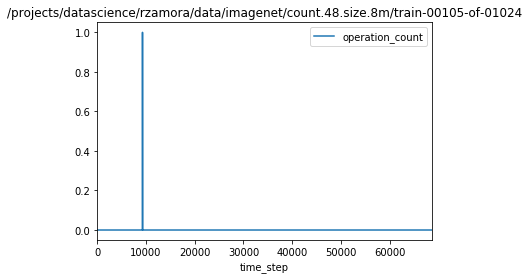

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00238-of-01024.csv


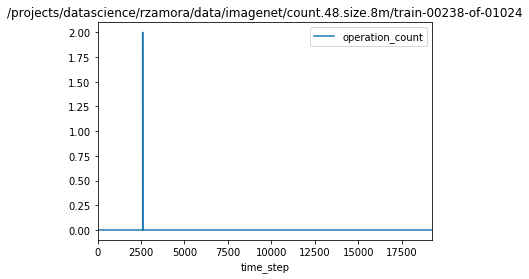

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00073-of-01024.csv


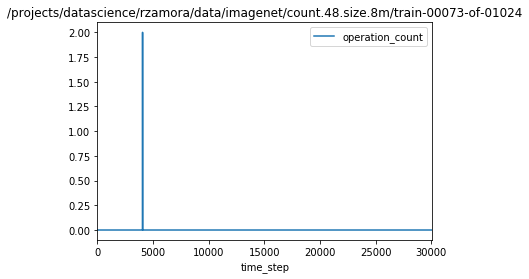

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00821-of-01024.csv


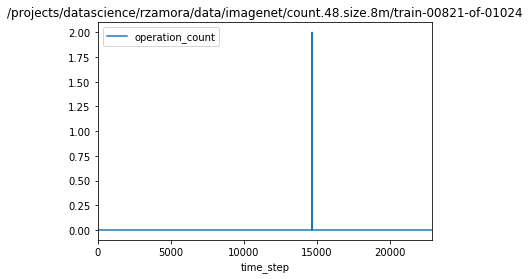

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00306-of-01024.csv


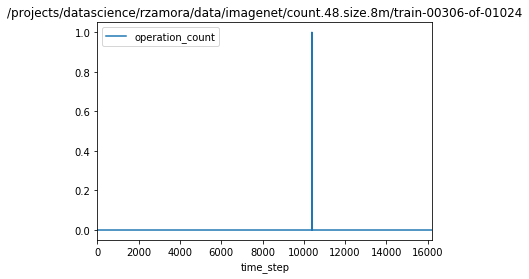

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00663-of-01024.csv


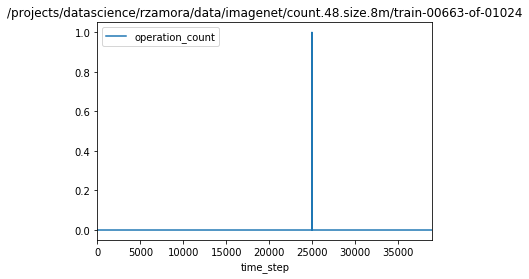

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00130-of-01024.csv


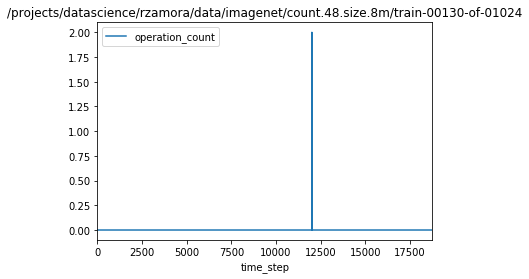

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00234-of-01024.csv


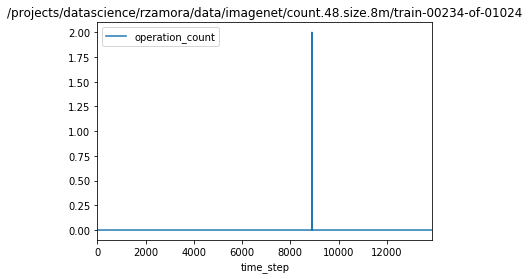

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00848-of-01024.csv


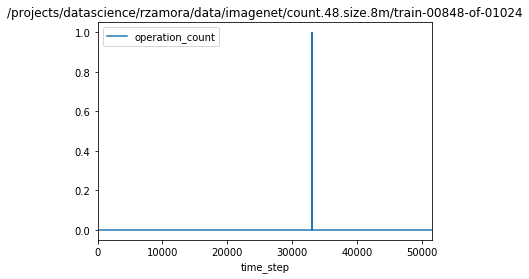

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00344-of-01024.csv


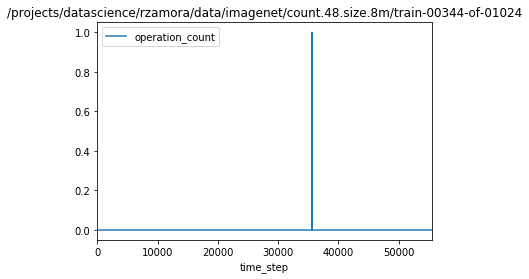

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00387-of-01024.csv


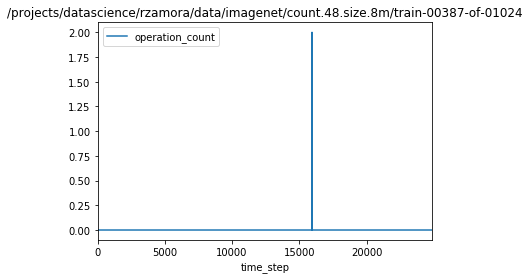

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00390-of-01024.csv


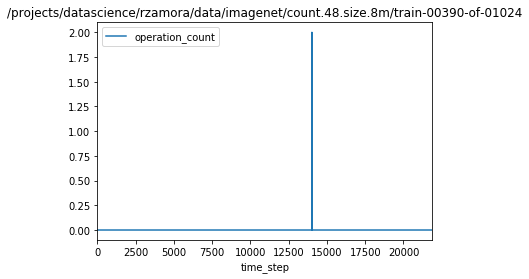

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00395-of-01024.csv


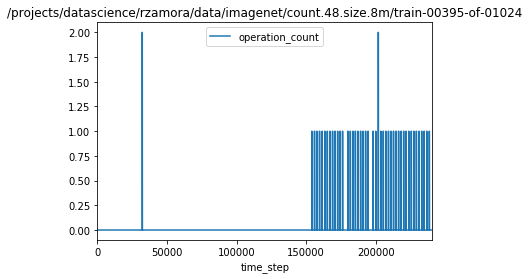

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00948-of-01024.csv


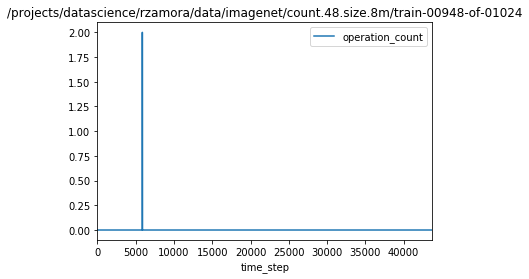

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00747-of-01024.csv


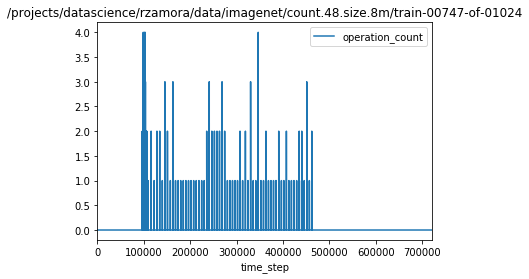

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00227-of-01024.csv


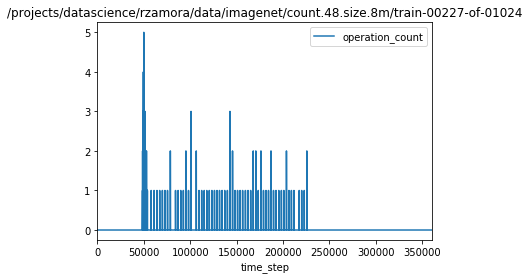

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00048-of-01024.csv


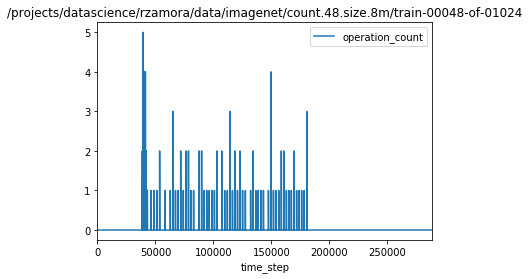

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-01015-of-01024.csv


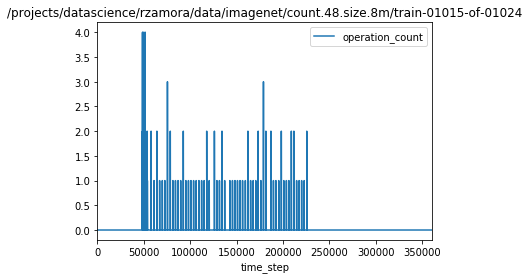

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00999-of-01024.csv


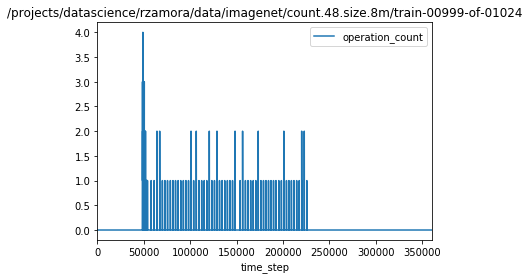

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00408-of-01024.csv


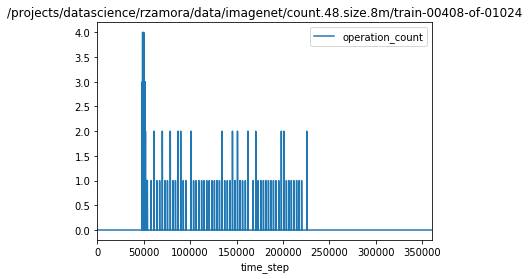

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00145-of-01024.csv


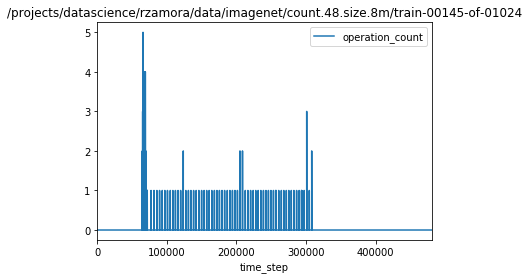

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00236-of-01024.csv


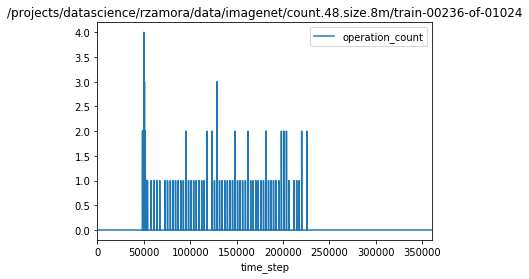

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00348-of-01024.csv


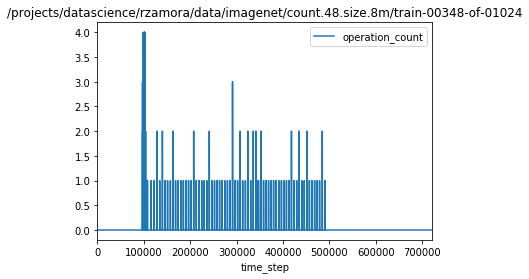

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00256-of-01024.csv


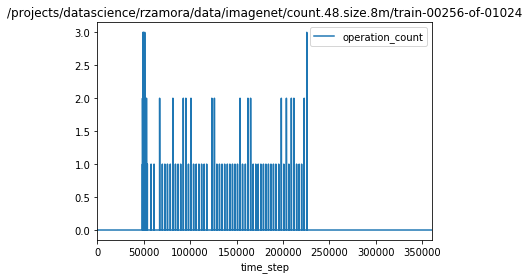

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00424-of-01024.csv


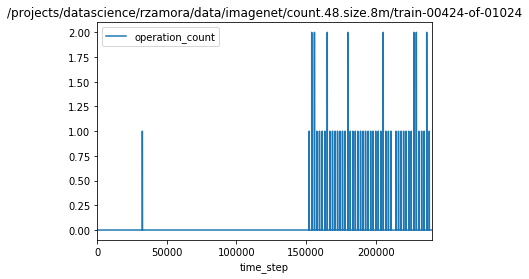

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00907-of-01024.csv


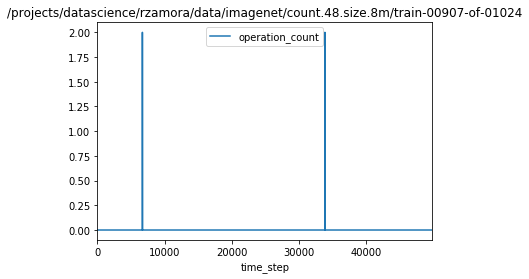

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00815-of-01024.csv


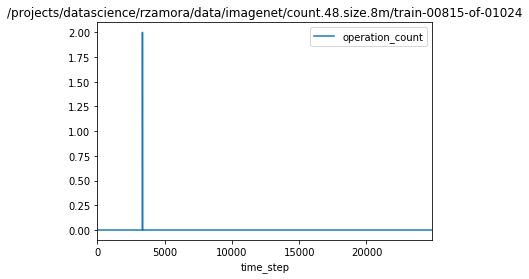

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00326-of-01024.csv


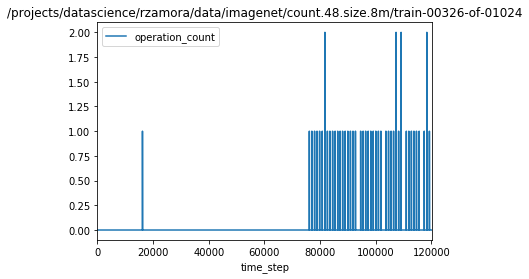

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00442-of-01024.csv


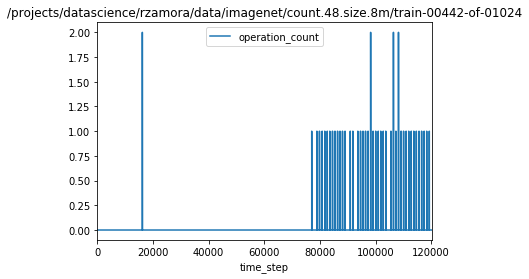

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00722-of-01024.csv


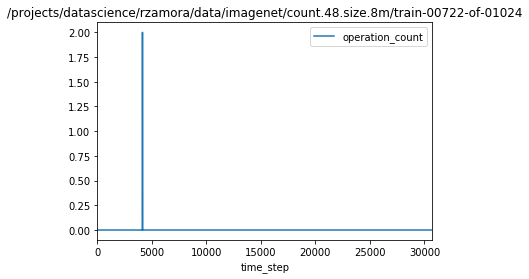

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00950-of-01024.csv


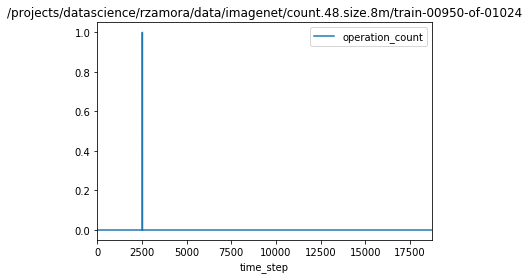

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00559-of-01024.csv


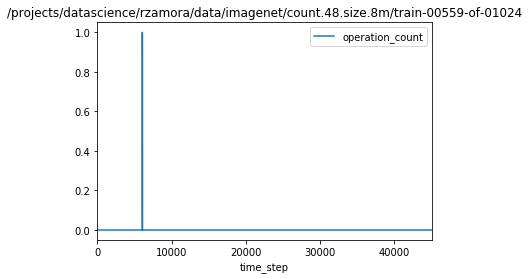

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00886-of-01024.csv


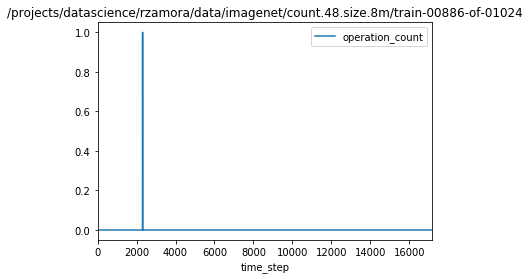

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00557-of-01024.csv


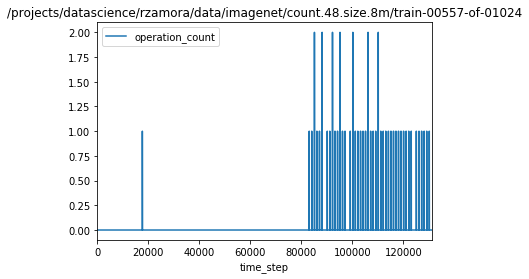

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00524-of-01024.csv


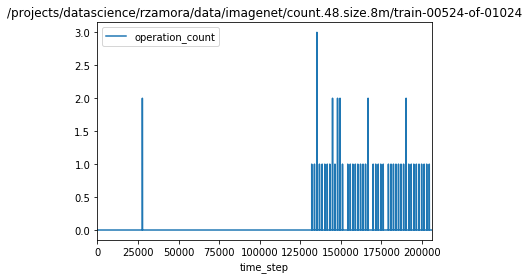

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00277-of-01024.csv


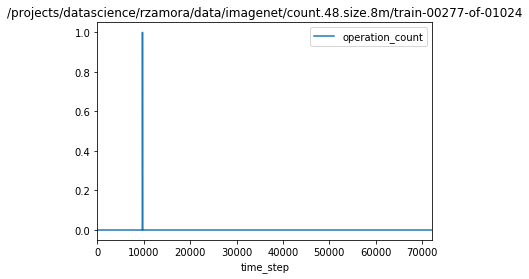

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00142-of-01024.csv


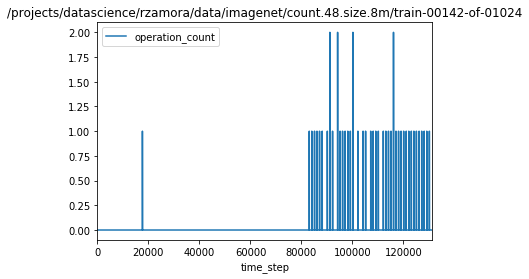

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00917-of-01024.csv


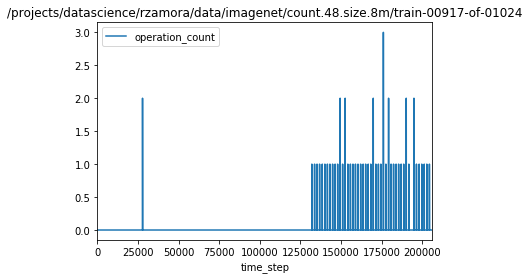

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00808-of-01024.csv


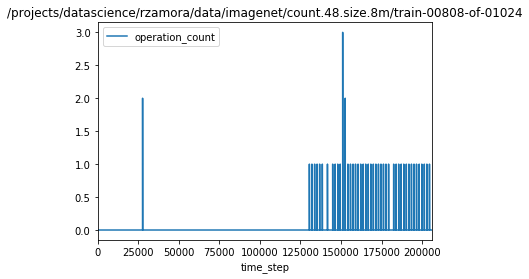

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00242-of-01024.csv


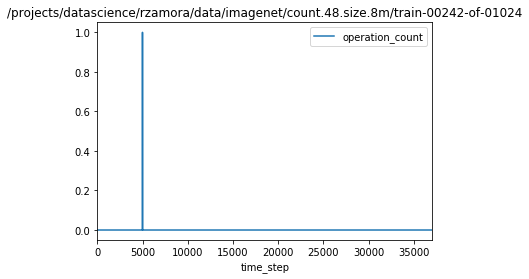

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00718-of-01024.csv


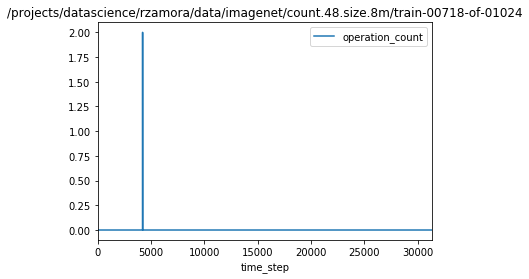

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00842-of-01024.csv


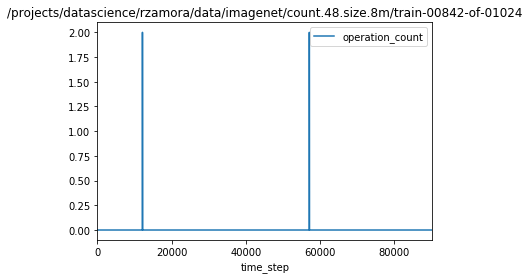

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00832-of-01024.csv


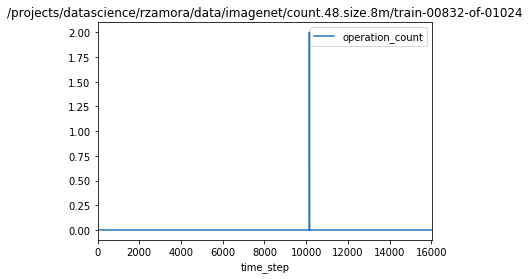

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00470-of-01024.csv


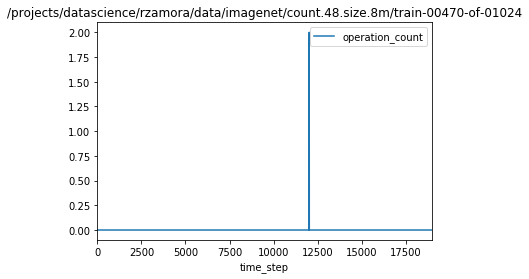

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00115-of-01024.csv


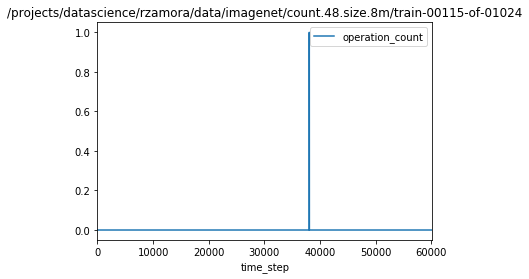

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00401-of-01024.csv


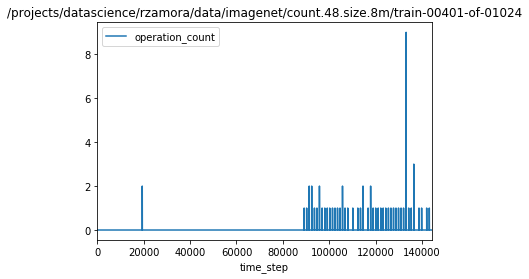

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00740-of-01024.csv


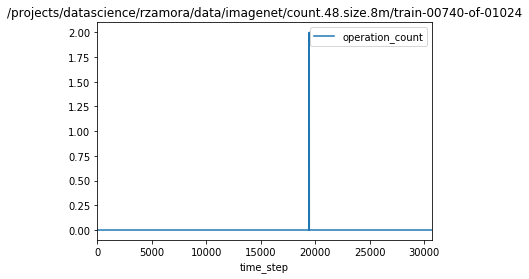

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00820-of-01024.csv


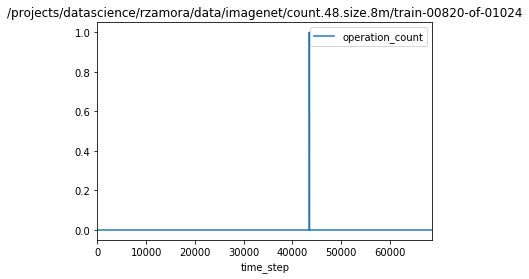

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00239-of-01024.csv


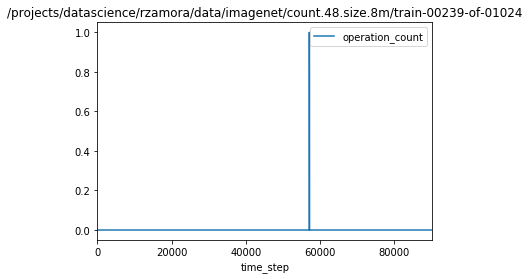

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00378-of-01024.csv


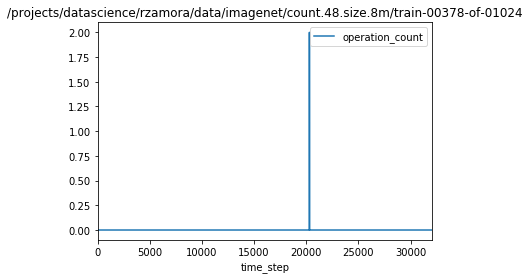

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00067-of-01024.csv


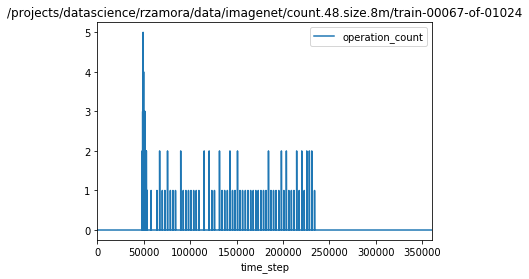

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00207-of-01024.csv


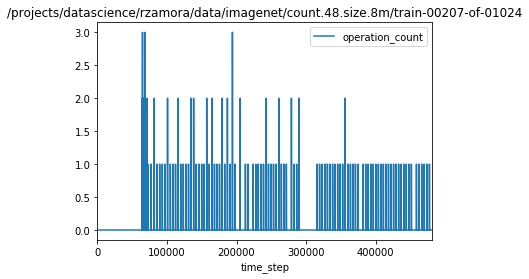

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00580-of-01024.csv


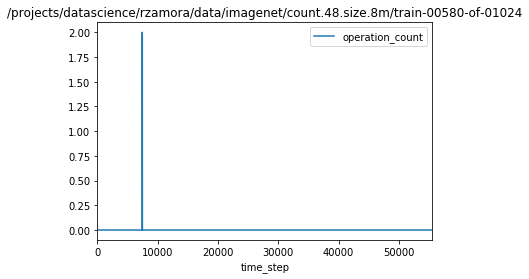

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00687-of-01024.csv


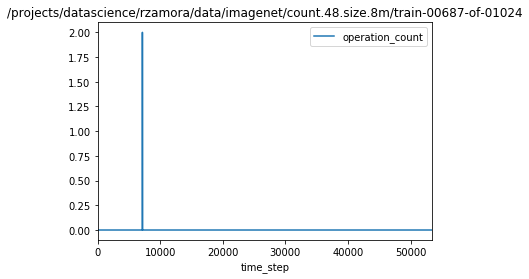

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00350-of-01024.csv


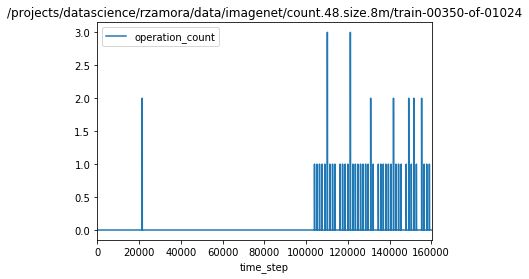

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00119-of-01024.csv


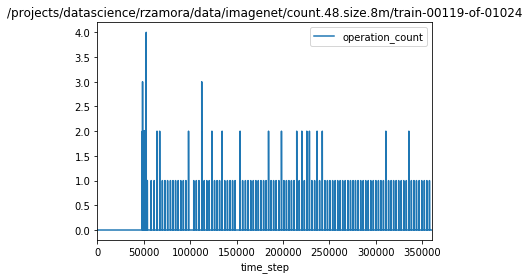

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00714-of-01024.csv


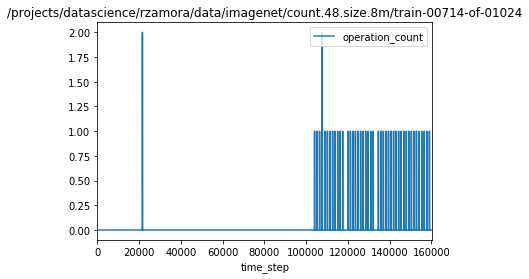

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00057-of-01024.csv


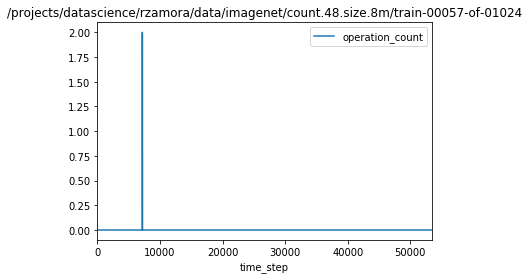

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00126-of-01024.csv


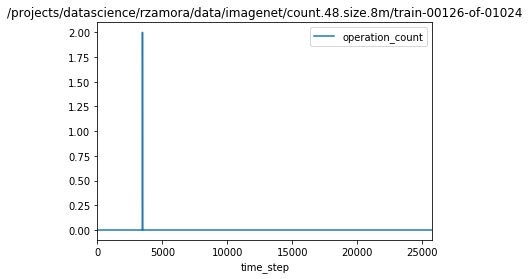

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00159-of-01024.csv


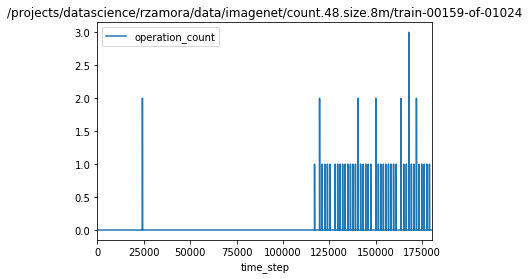

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00068-of-01024.csv


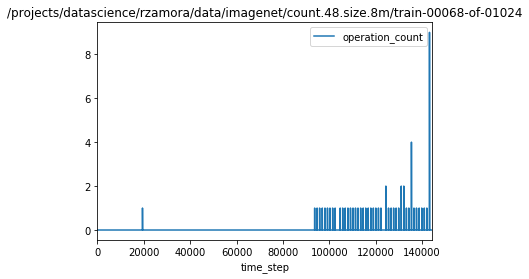

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00935-of-01024.csv


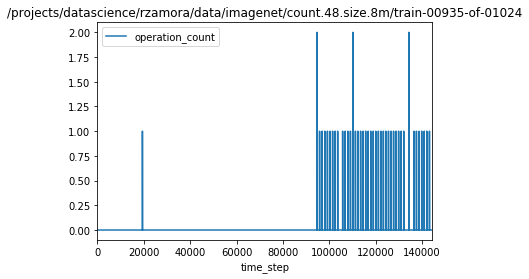

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00202-of-01024.csv


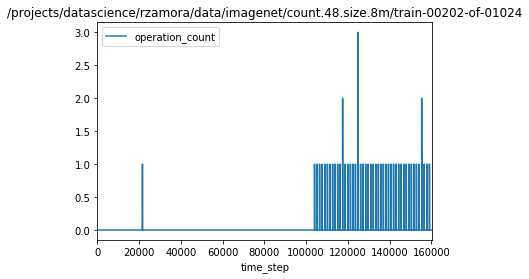

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00959-of-01024.csv


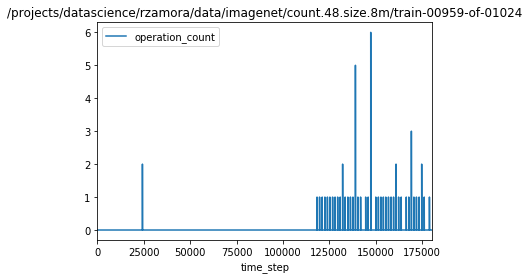

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00536-of-01024.csv


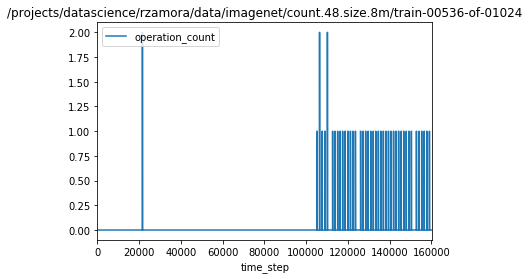

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00075-of-01024.csv


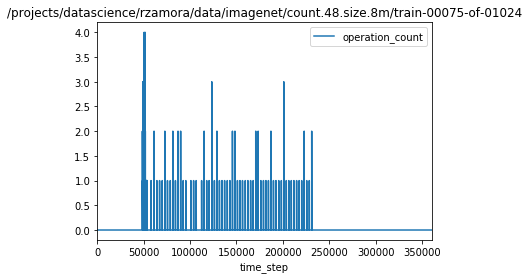

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00331-of-01024.csv


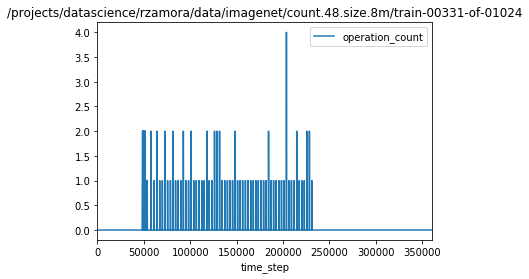

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00810-of-01024.csv


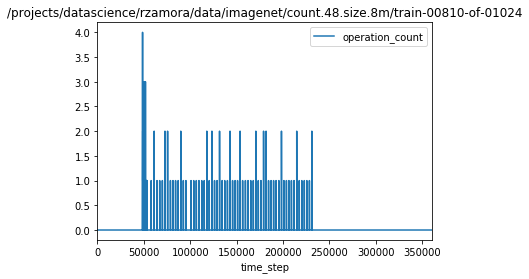

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00567-of-01024.csv


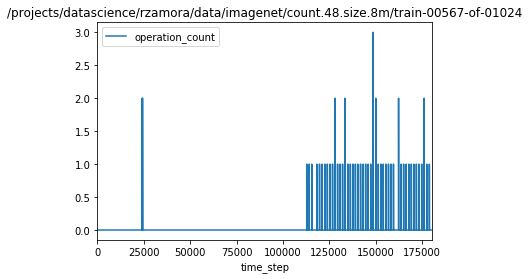

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00858-of-01024.csv


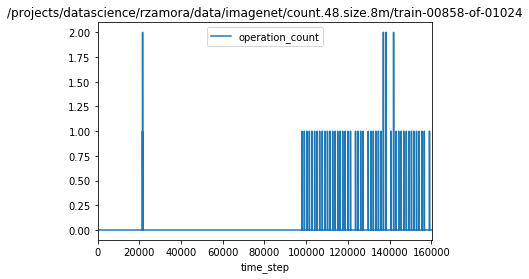

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00325-of-01024.csv


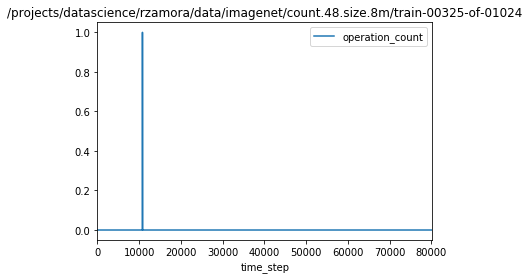

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00969-of-01024.csv


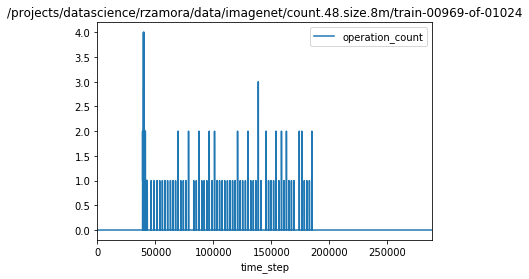

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00591-of-01024.csv


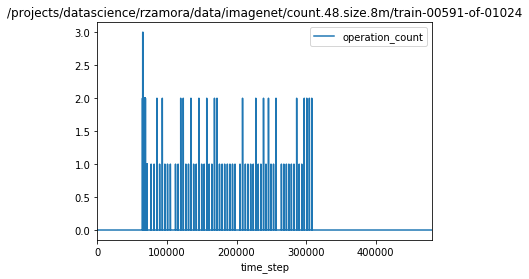

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00750-of-01024.csv


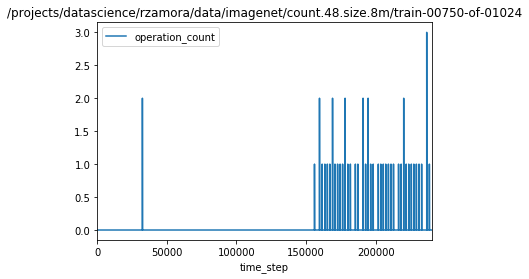

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00651-of-01024.csv


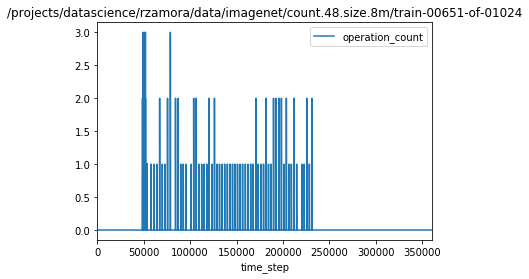

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00046-of-01024.csv


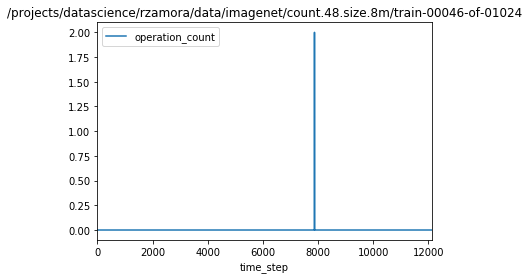

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00392-of-01024.csv


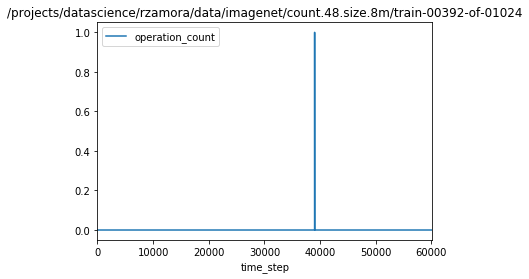

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00063-of-01024.csv


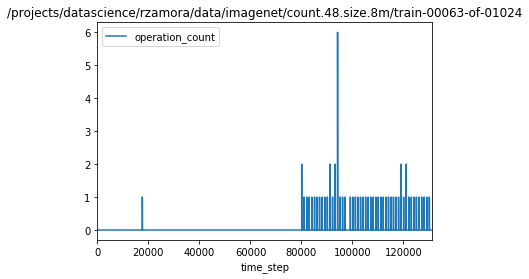

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00082-of-01024.csv


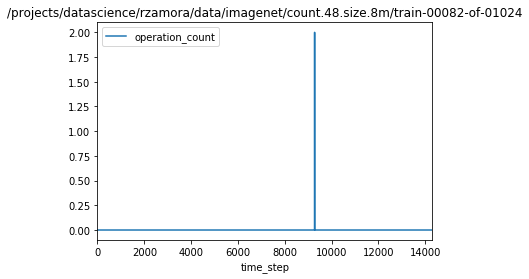

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00753-of-01024.csv


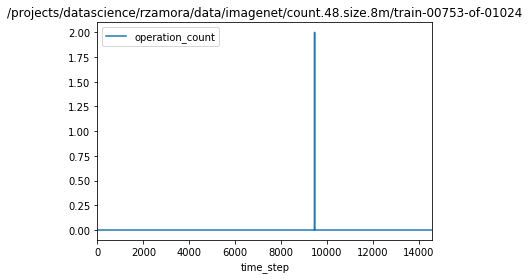

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00209-of-01024.csv


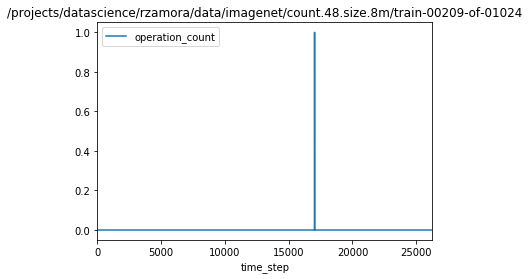

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00756-of-01024.csv


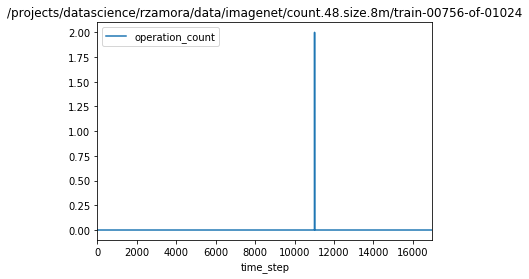

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00672-of-01024.csv


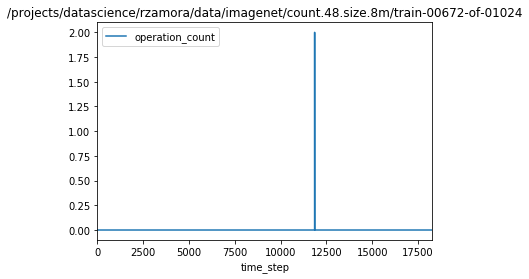

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00394-of-01024.csv


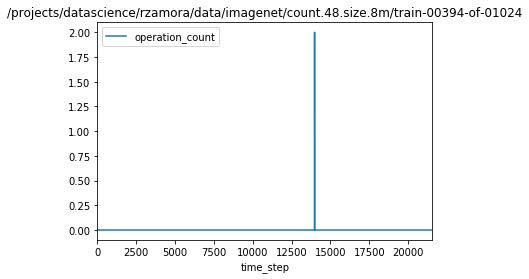

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00870-of-01024.csv


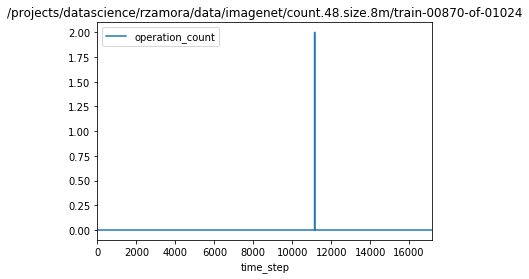

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00566-of-01024.csv


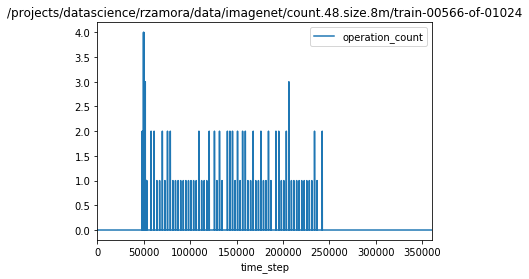

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00412-of-01024.csv


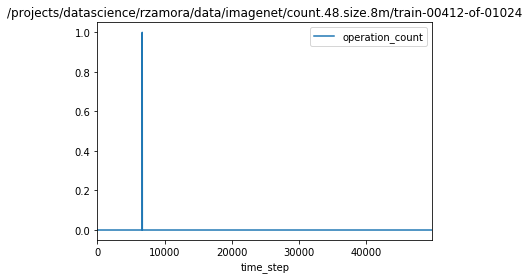

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00456-of-01024.csv


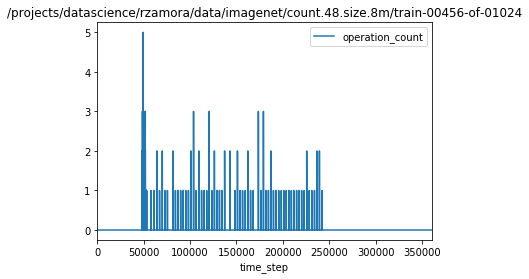

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00149-of-01024.csv


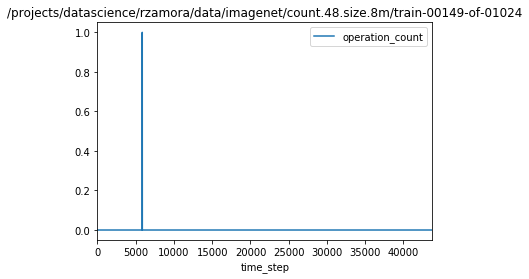

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00990-of-01024.csv


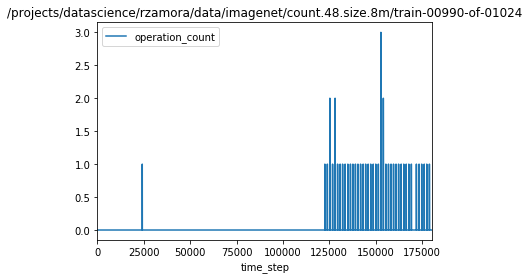

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00255-of-01024.csv


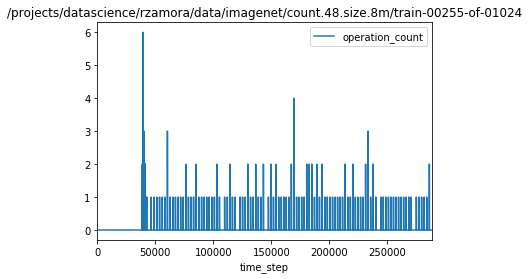

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00491-of-01024.csv


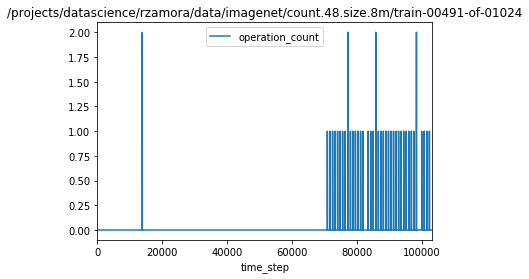

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00336-of-01024.csv


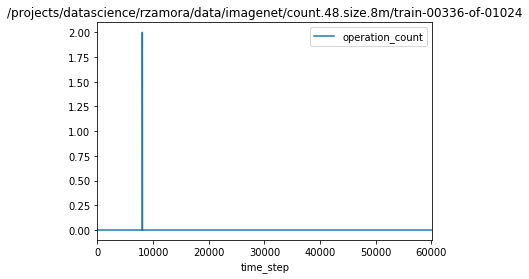

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00901-of-01024.csv


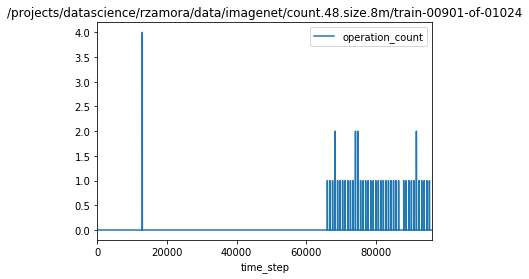

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00146-of-01024.csv


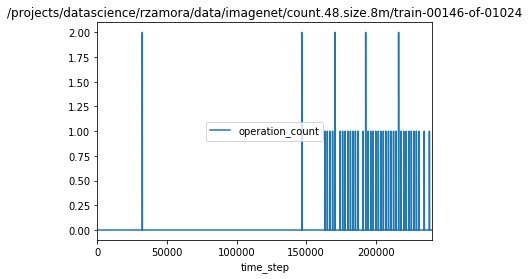

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00791-of-01024.csv


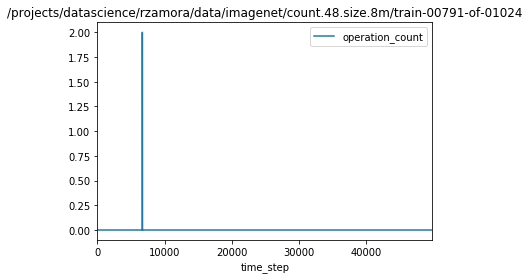

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-01004-of-01024.csv


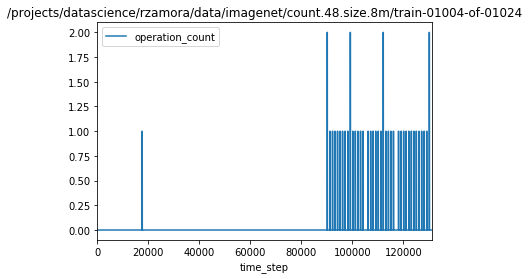

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00590-of-01024.csv


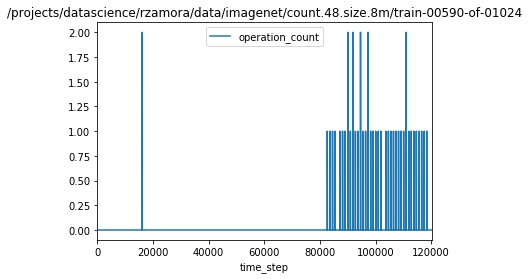

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00320-of-01024.csv


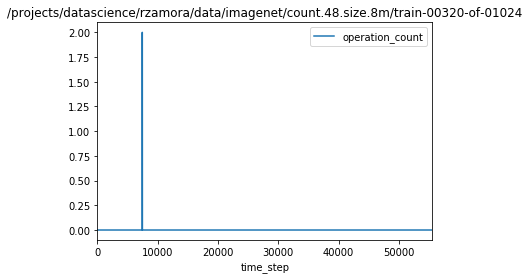

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00850-of-01024.csv


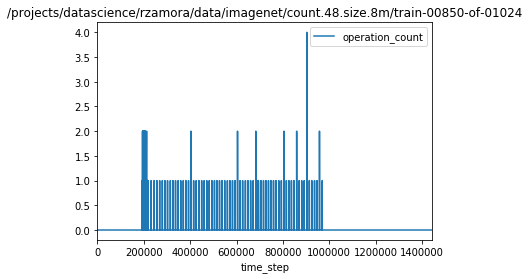

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00501-of-01024.csv


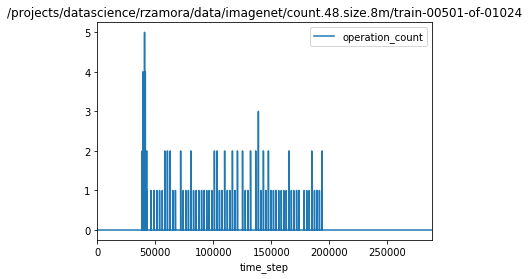

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00166-of-01024.csv


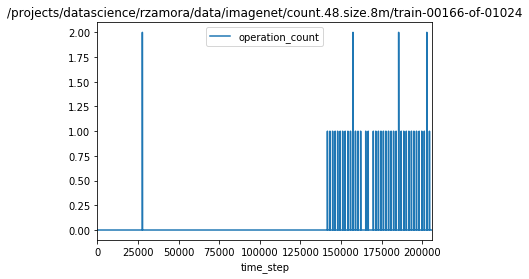

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00419-of-01024.csv


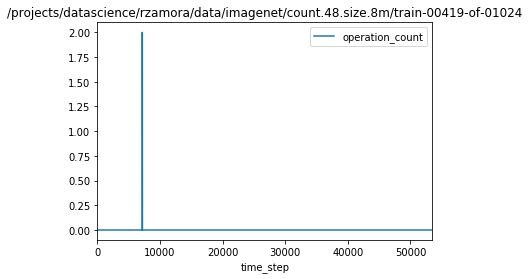

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00682-of-01024.csv


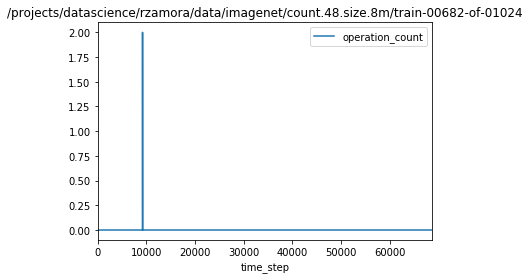

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00592-of-01024.csv


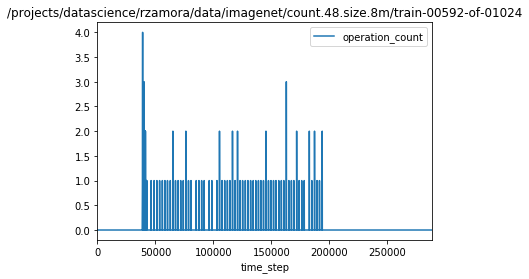

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00939-of-01024.csv


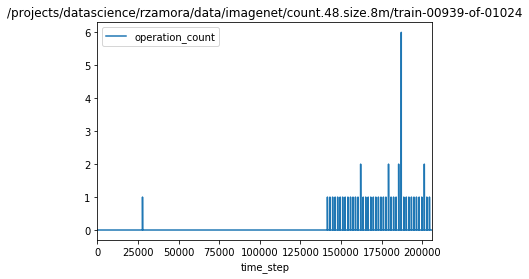

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00480-of-01024.csv


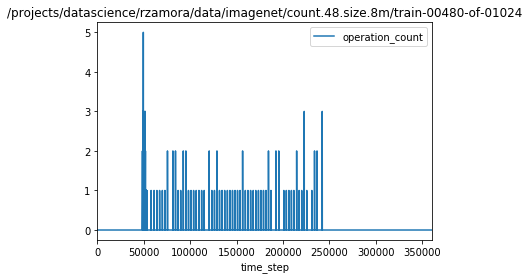

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00734-of-01024.csv


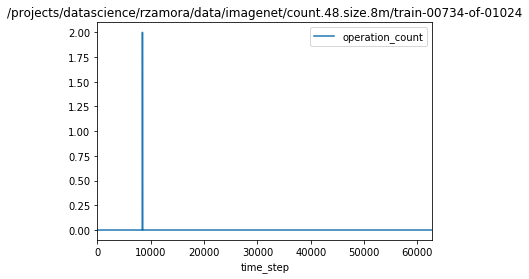

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00345-of-01024.csv


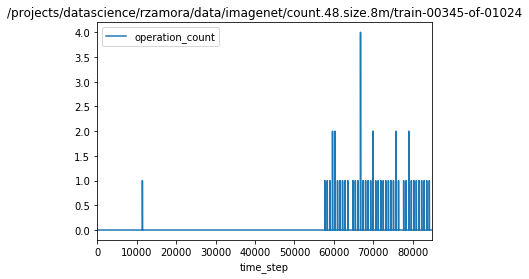

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00090-of-01024.csv


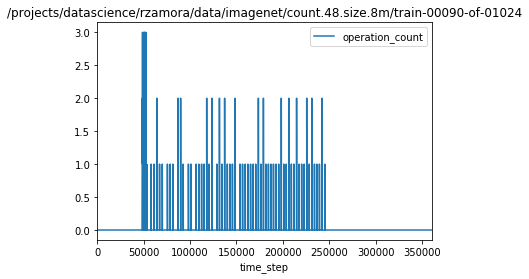

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-01018-of-01024.csv


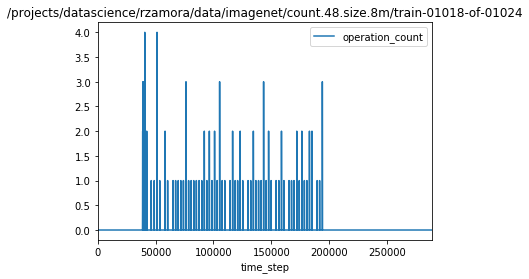

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00465-of-01024.csv


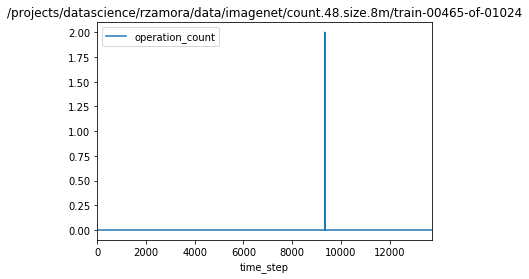

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00330-of-01024.csv


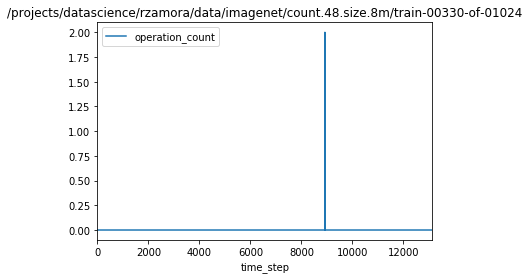

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00360-of-01024.csv


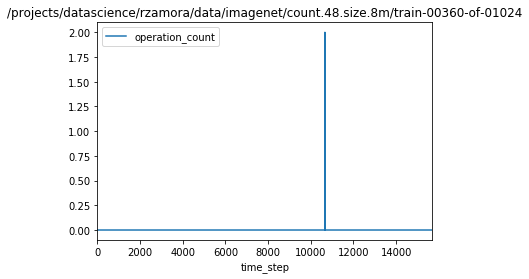

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00968-of-01024.csv


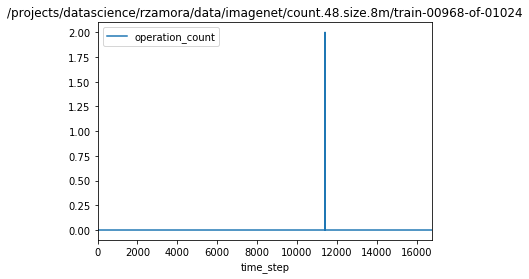

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00897-of-01024.csv


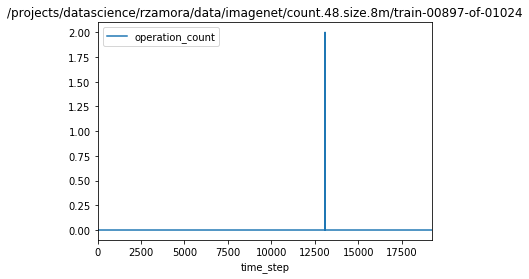

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00784-of-01024.csv


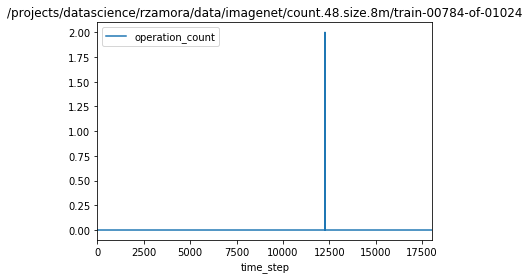

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00490-of-01024.csv


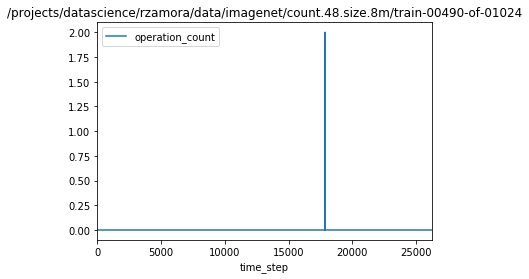

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00953-of-01024.csv


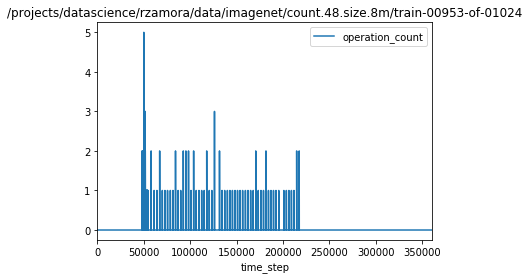

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00477-of-01024.csv


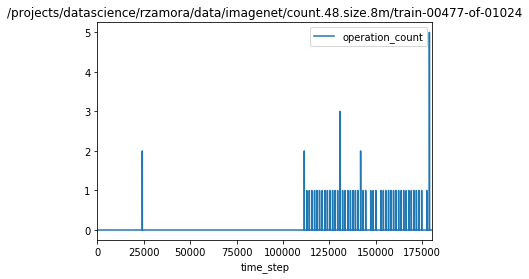

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00071-of-01024.csv


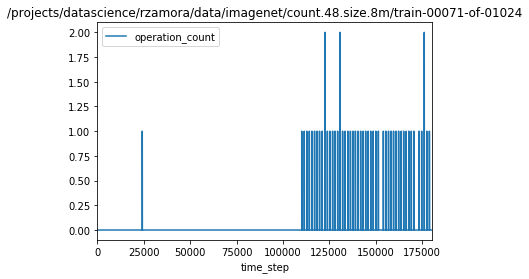

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00751-of-01024.csv


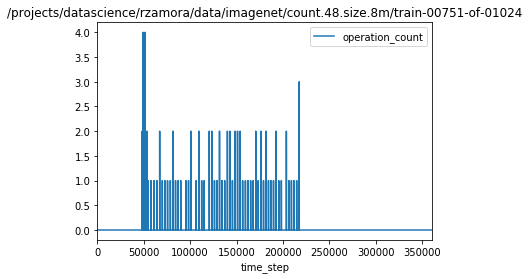

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00664-of-01024.csv


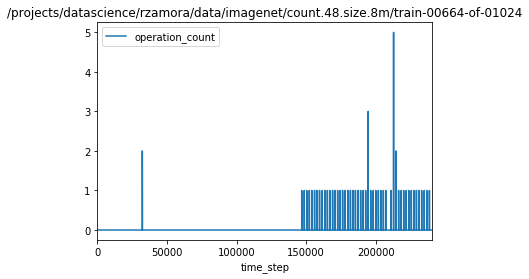

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00148-of-01024.csv


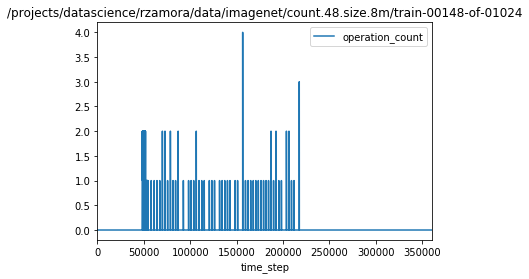

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00283-of-01024.csv


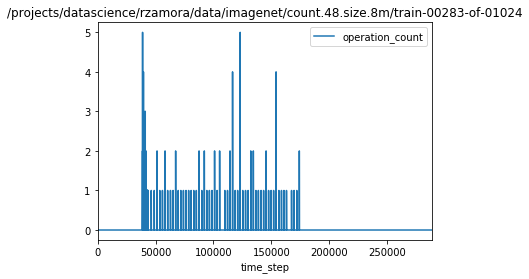

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00099-of-01024.csv


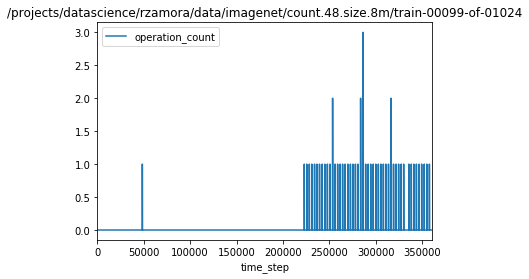

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00598-of-01024.csv


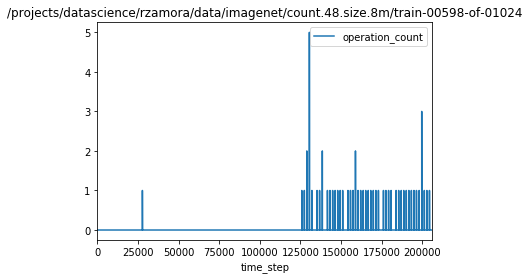

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00766-of-01024.csv


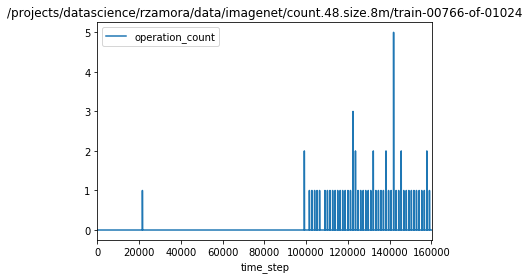

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00843-of-01024.csv


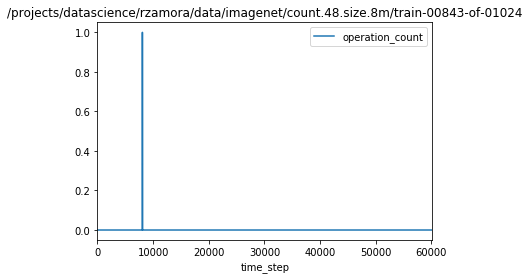

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00001-of-01024.csv


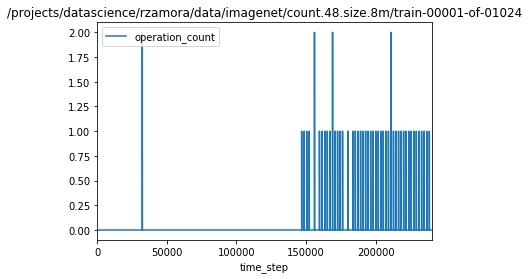

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00761-of-01024.csv


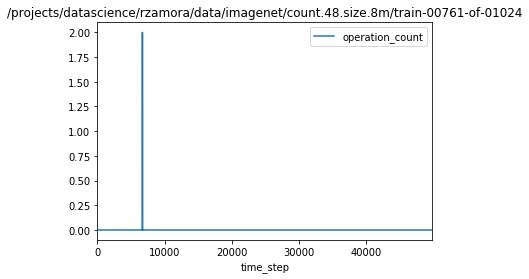

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00527-of-01024.csv


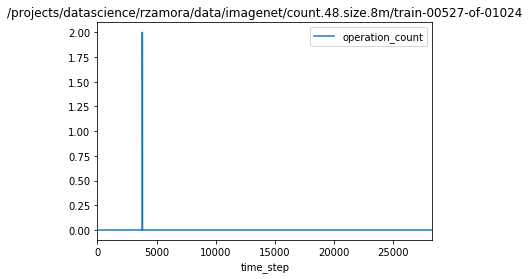

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00866-of-01024.csv


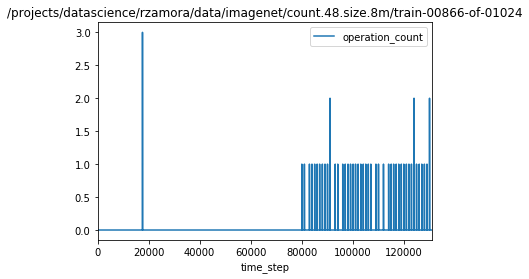

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00582-of-01024.csv


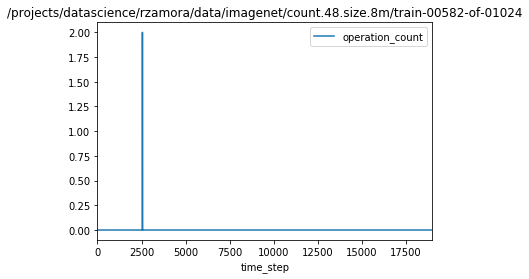

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-01011-of-01024.csv


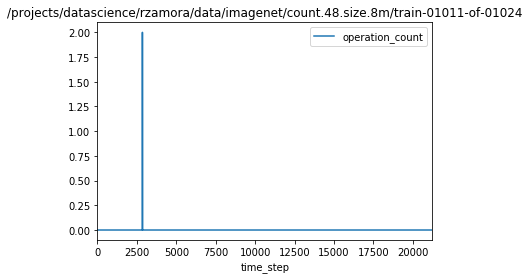

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00222-of-01024.csv


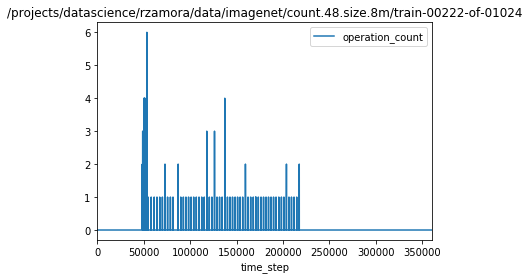

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00178-of-01024.csv


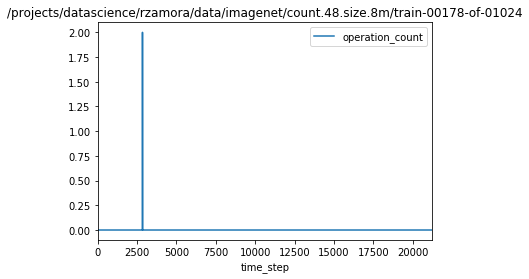

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00847-of-01024.csv


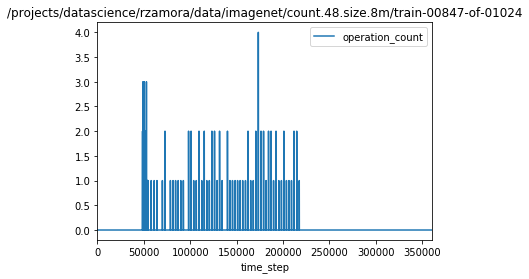

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00495-of-01024.csv


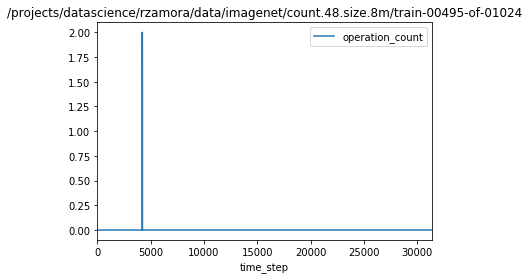

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00919-of-01024.csv


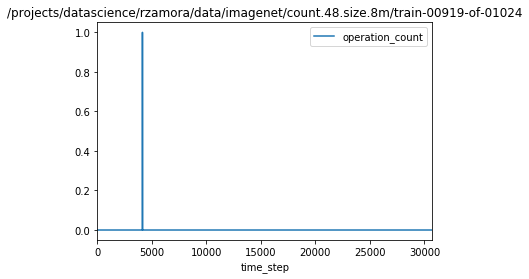

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00514-of-01024.csv


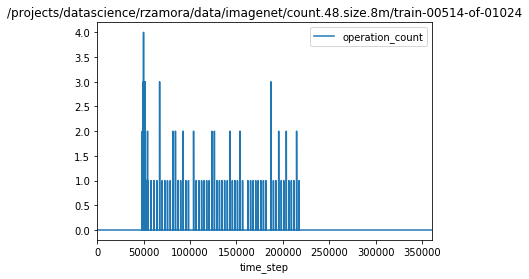

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00798-of-01024.csv


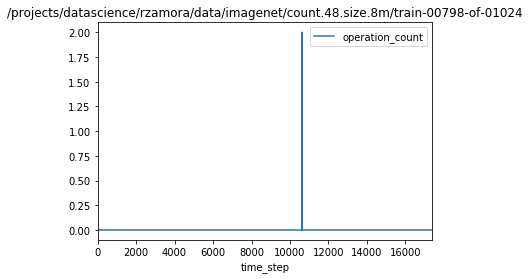

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00656-of-01024.csv


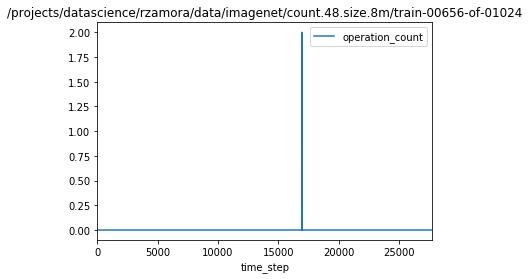

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00775-of-01024.csv


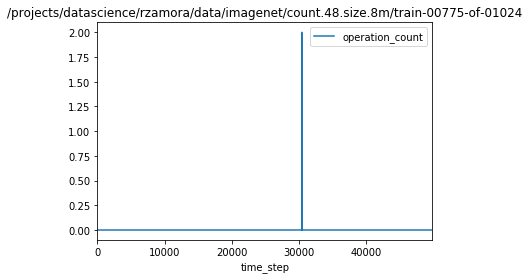

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00193-of-01024.csv


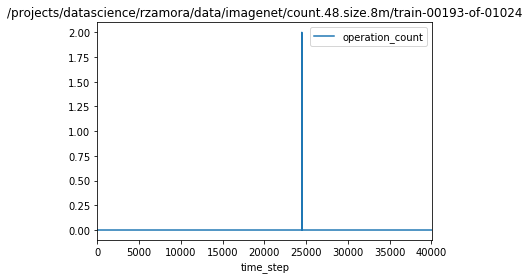

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00031-of-01024.csv


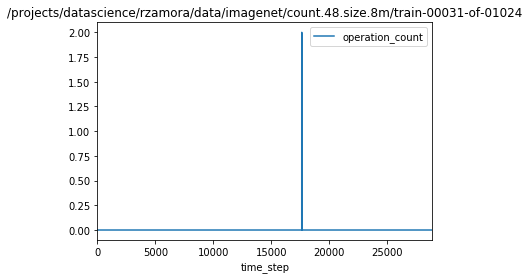

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00906-of-01024.csv


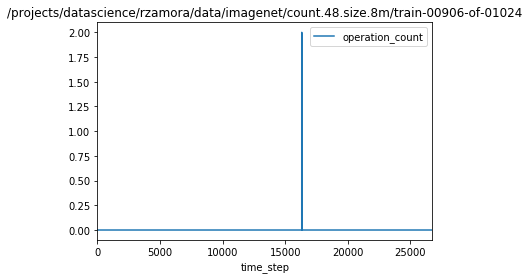

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00648-of-01024.csv


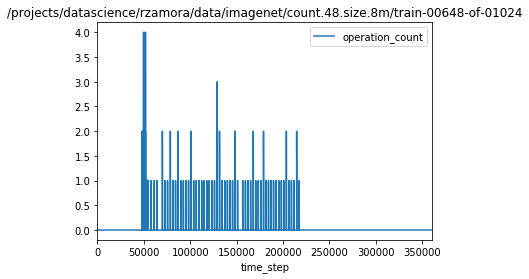

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00857-of-01024.csv


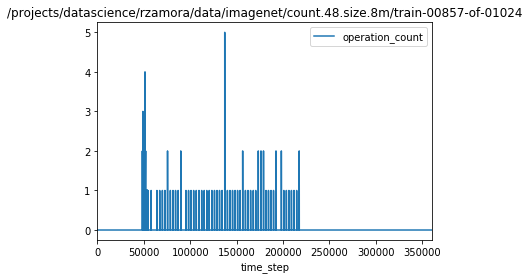

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00900-of-01024.csv


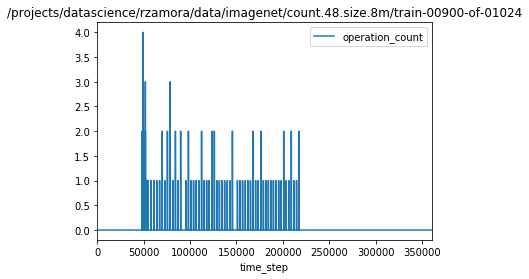

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00745-of-01024.csv


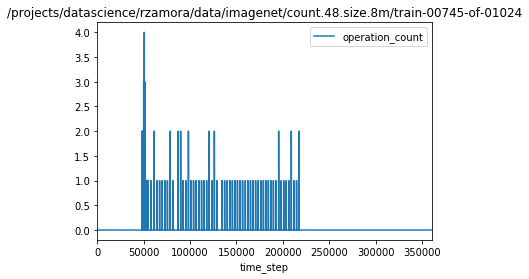

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00918-of-01024.csv


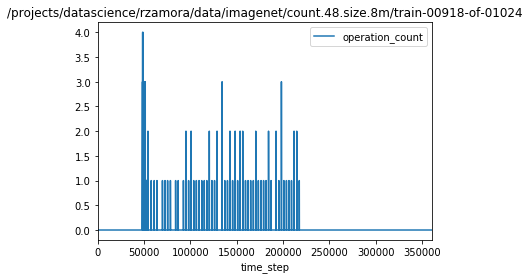

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00956-of-01024.csv


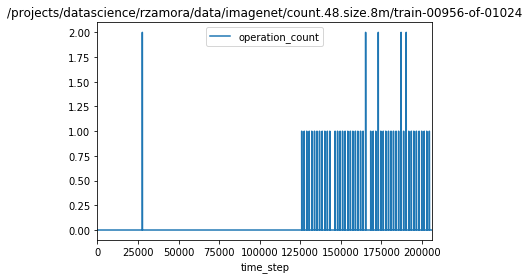

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00938-of-01024.csv


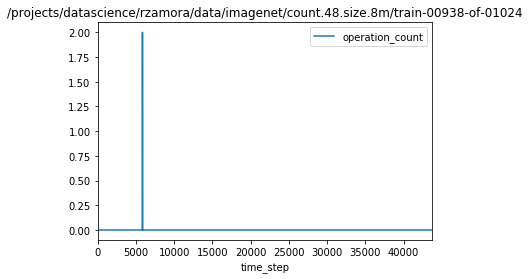

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00289-of-01024.csv


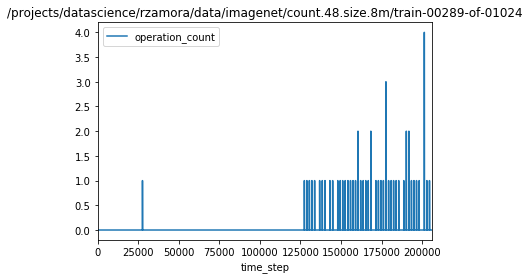

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00113-of-01024.csv


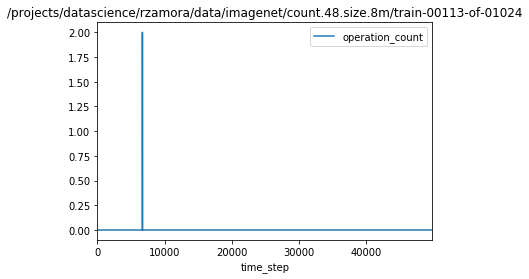

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00282-of-01024.csv


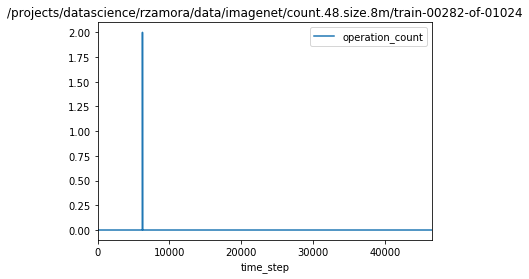

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00038-of-01024.csv


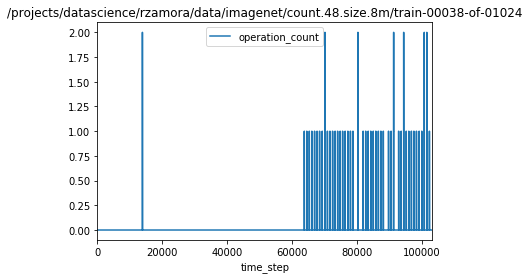

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00813-of-01024.csv


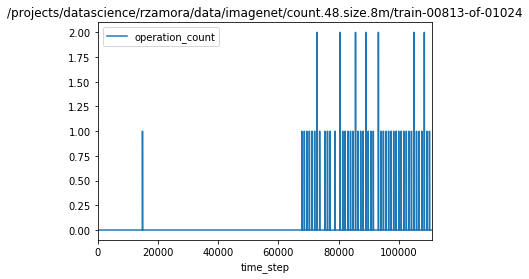

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00388-of-01024.csv


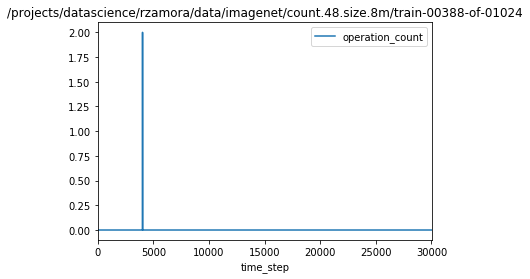

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-01005-of-01024.csv


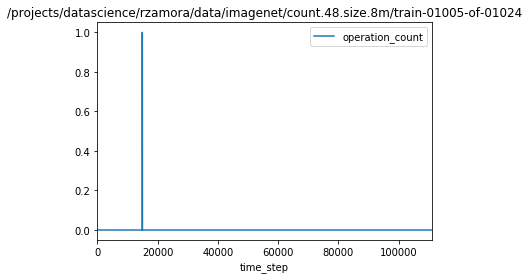

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00385-of-01024.csv


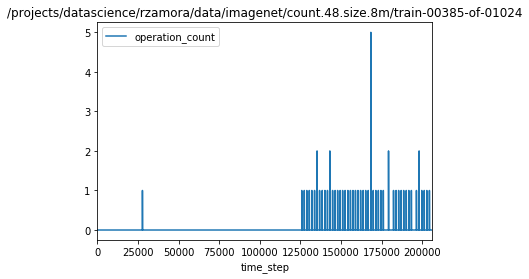

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00960-of-01024.csv


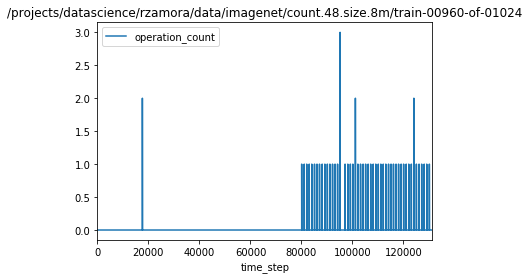

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00226-of-01024.csv


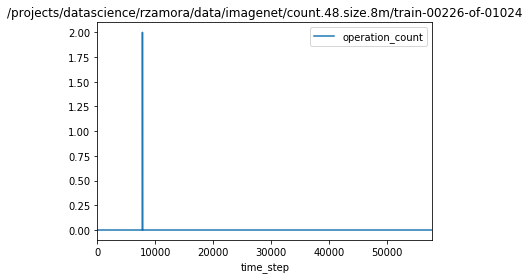

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00322-of-01024.csv


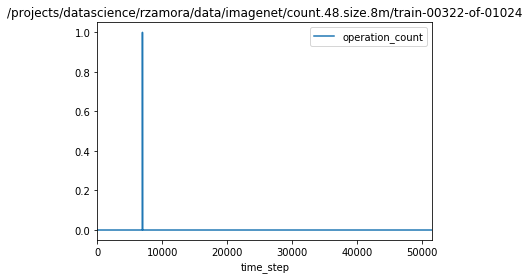

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00235-of-01024.csv


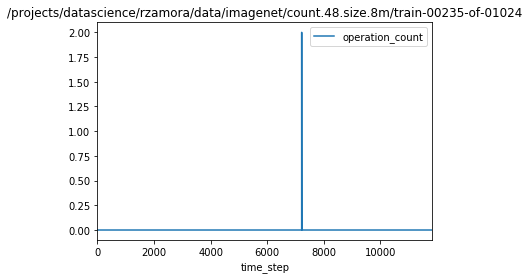

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00027-of-01024.csv


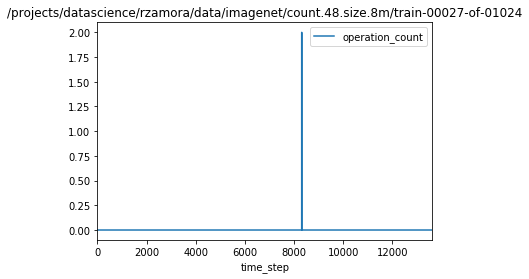

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00128-of-01024.csv


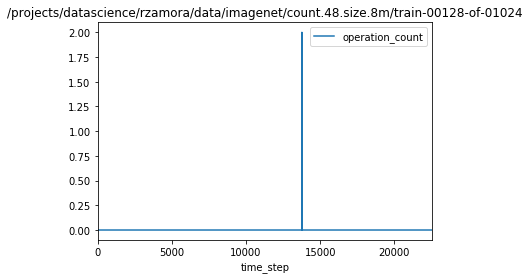

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00728-of-01024.csv


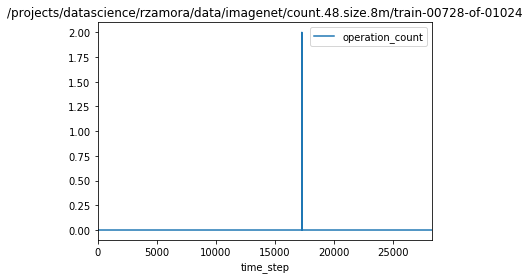

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00279-of-01024.csv


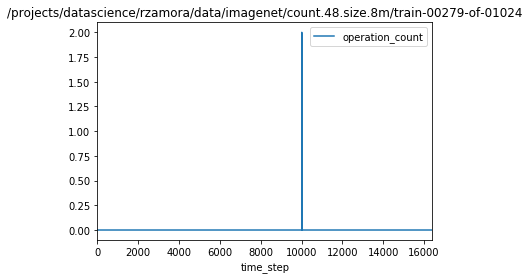

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00428-of-01024.csv


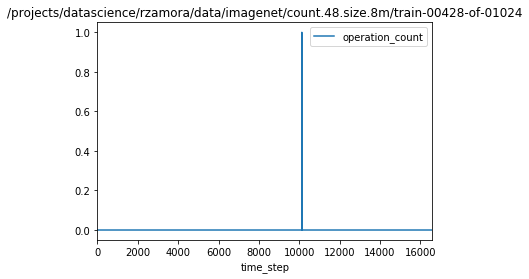

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00333-of-01024.csv


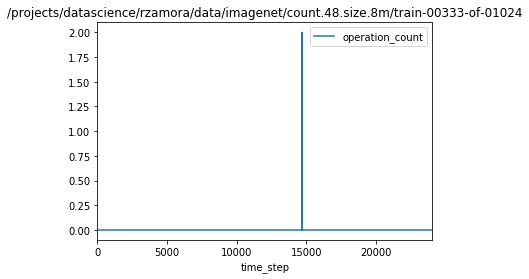

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00097-of-01024.csv


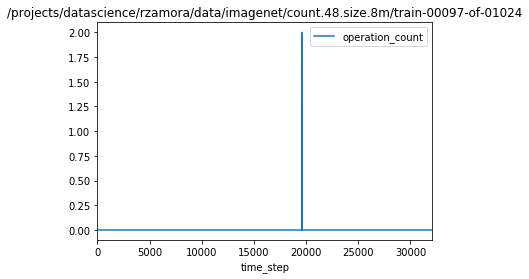

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_train-00454-of-01024.csv


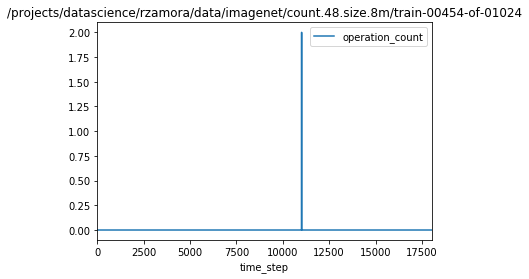

In [20]:
for file in df['Filename'].unique():
    tl = profile.CreateIOTimeline(filepath=file)
    tl.plot(x='time_step',y='operation_count', title=file)
    plt.show()

### Show how each file is accessed by each rank.

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_0.csv


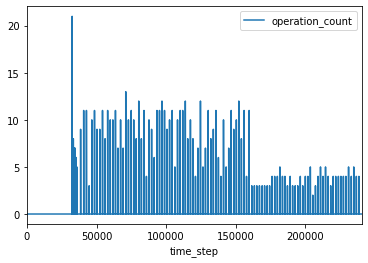

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_1.csv


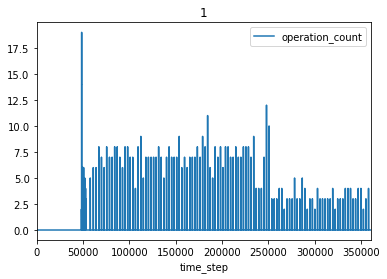

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_2.csv


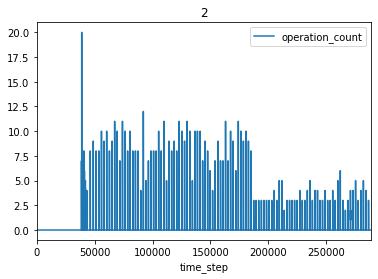

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_3.csv


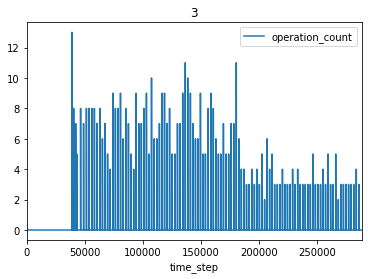

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_4.csv


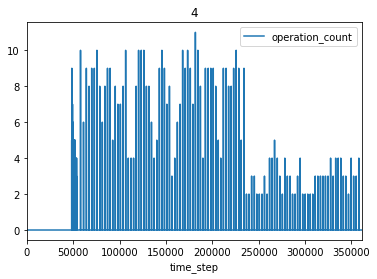

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_5.csv


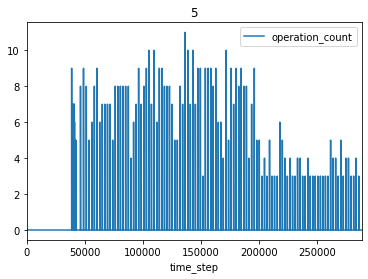

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_6.csv


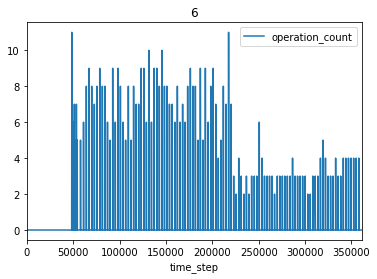

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/imagenet_run1_p8_tm_df_7.csv


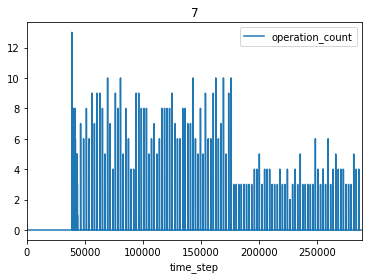

In [21]:
for rank in df['Rank'].unique():
    tl = profile.CreateIOTimeline(rank=rank)
    tl.plot(x='time_step',y='operation_count', title=rank)
    plt.show()

### Data Transfer Size distribution within the application

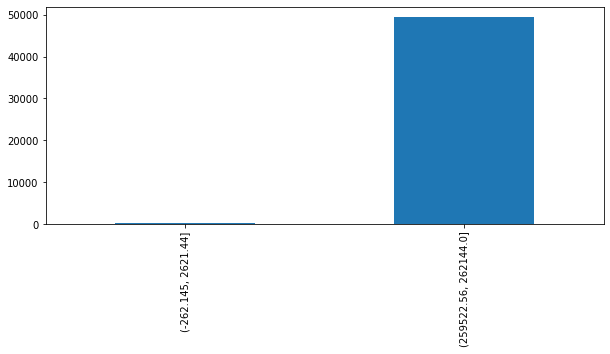

In [22]:
request_df = profile.GetIORequestDistribution()
request_df.plot(kind='bar', figsize=(10, 4));

### Data Transfer Size distribution for each file.

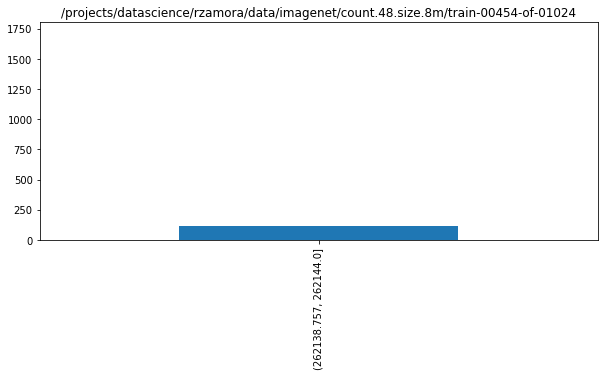

In [23]:
for file in df['Filename'].unique():
    tl = profile.GetIORequestDistribution(filepath=file)
    tl.plot(kind='bar', figsize=(10, 4), title=file)

### Data Transfer Sizes per Rank

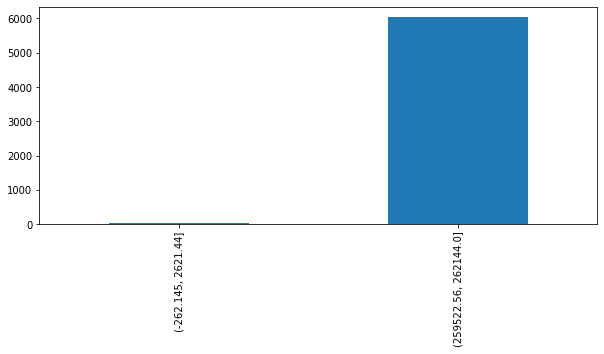

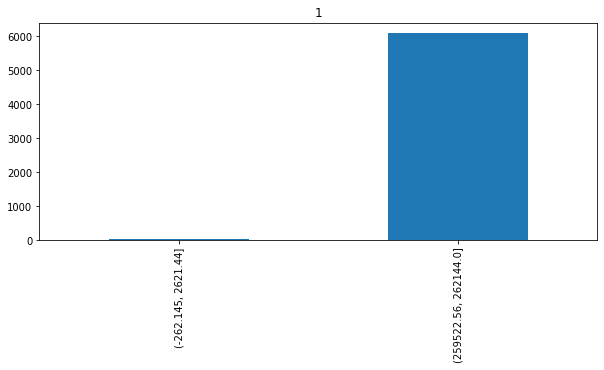

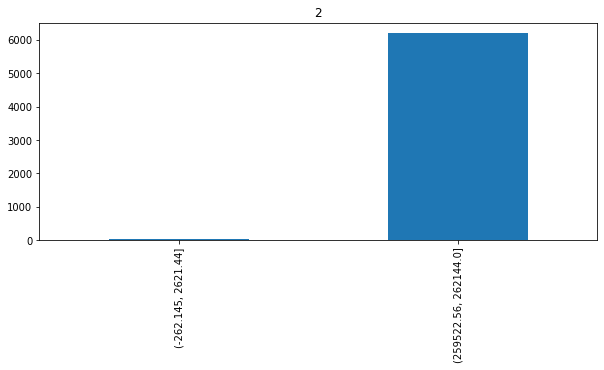

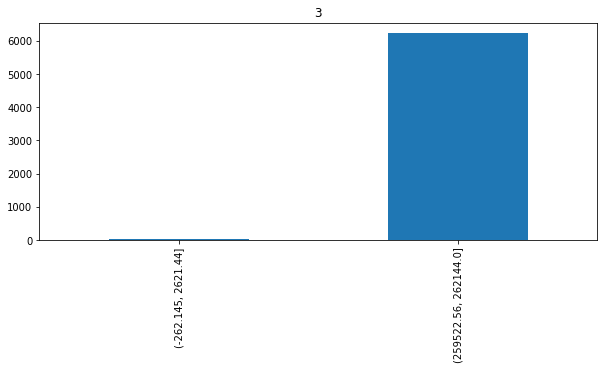

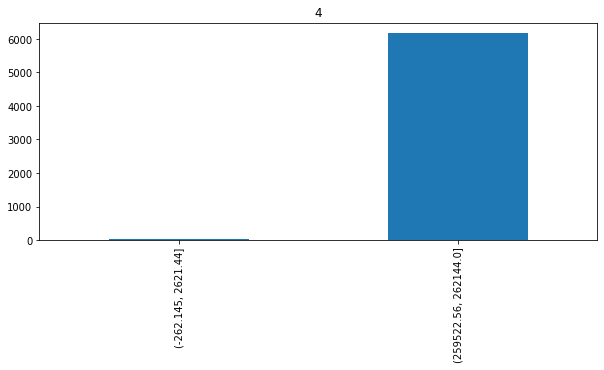

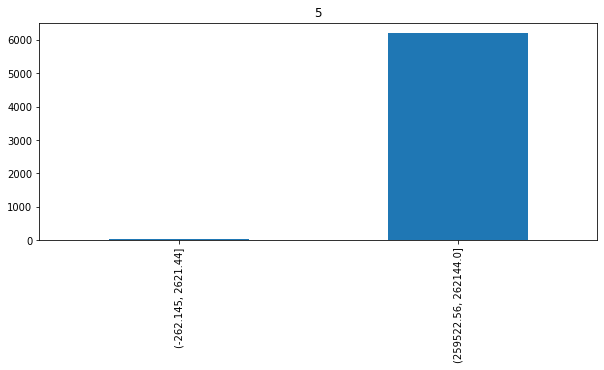

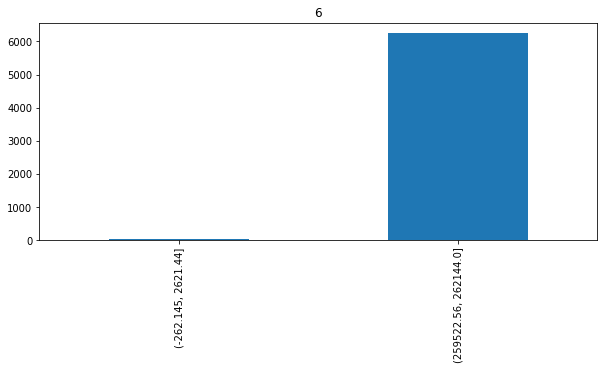

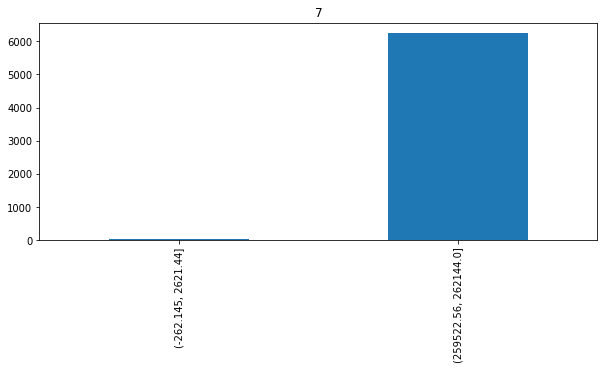

In [24]:
for rank in df['Rank'].unique():
    tl = profile.GetIORequestDistribution(rank=rank)
    tl.plot(kind='bar', figsize=(10, 4), title=rank)
    plt.show()

### File summary of each file accessed by the Application

In [25]:
pp = pprint.PrettyPrinter(indent=1)
for file in df['Filename'].unique():
    if 'h5' in file:
        pp.pprint(profile.GetFileSummary(file,ext='h5'))
    else:
        pp.pprint(profile.GetFileSummary(file,ext='tfrecord',tf_record_features={
      'image/encoded': tf.io.FixedLenFeature((), dtype=tf.string, default_value=''),
      'image/source_id': tf.io.FixedLenFeature((), tf.string, default_value=''),
      'image/height': tf.io.FixedLenFeature((), tf.int64, default_value=1),
      'image/width': tf.io.FixedLenFeature((), tf.int64, default_value=1),
      'image/object/bbox/xmin': tf.io.VarLenFeature(dtype=tf.float32),
      'image/object/bbox/ymin': tf.io.VarLenFeature(dtype=tf.float32),
      'image/object/bbox/xmax': tf.io.VarLenFeature(dtype=tf.float32),
      'image/object/bbox/ymax': tf.io.VarLenFeature(dtype=tf.float32),
      'image/object/class/label': tf.io.VarLenFeature(dtype=tf.int64),
      'image/object/class/text': tf.io.FixedLenFeature((), dtype=tf.string, default_value=''),
      'image/colorspace': tf.io.FixedLenFeature((), tf.string, default_value=''),
      'image/channels': tf.io.FixedLenFeature((), tf.int64, default_value=1),
      'image/format': tf.io.FixedLenFeature((), tf.string, default_value=''),
      'image/filename': tf.io.FixedLenFeature((), tf.string, default_value='')
  }))

{'ext': 'tfrecord',
 'filename': 'train-00263-of-01024',
 'io_size': 140498642,
 'io_time': 2.732300000001061,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00263-of-01024',
 'size': 140498642,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, i

{'ext': 'tfrecord',
 'filename': 'train-00765-of-01024',
 'io_size': 31195136,
 'io_time': 0.8094999999999857,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00765-of-01024',
 'size': 150005173,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, i

{'ext': 'tfrecord',
 'filename': 'train-00996-of-01024',
 'io_size': 524288,
 'io_time': 0.09139999999996462,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00996-of-01024',
 'size': 152863181,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, im

{'ext': 'tfrecord',
 'filename': 'train-00104-of-01024',
 'io_size': 524288,
 'io_time': 0.1613999999999578,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00104-of-01024',
 'size': 142367623,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, ima

{'ext': 'tfrecord',
 'filename': 'train-01021-of-01024',
 'io_size': 290714300,
 'io_time': 2.8158000000003938,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-01021-of-01024',
 'size': 145357150,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, 

{'ext': 'tfrecord',
 'filename': 'train-00308-of-01024',
 'io_size': 150872953,
 'io_time': 2.490899999998959,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00308-of-01024',
 'size': 149037945,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, i

{'ext': 'tfrecord',
 'filename': 'train-00051-of-01024',
 'io_size': 524288,
 'io_time': 0.050199999999961165,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00051-of-01024',
 'size': 145511429,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, i

{'ext': 'tfrecord',
 'filename': 'train-00384-of-01024',
 'io_size': 134226561,
 'io_time': 2.562899999999047,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00384-of-01024',
 'size': 134226561,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, i

{'ext': 'tfrecord',
 'filename': 'train-00469-of-01024',
 'io_size': 17563648,
 'io_time': 0.6467999999999847,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00469-of-01024',
 'size': 141267980,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, i

{'ext': 'tfrecord',
 'filename': 'train-00130-of-01024',
 'io_size': 524288,
 'io_time': 0.15440000000000964,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00130-of-01024',
 'size': 142797087,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, im

{'ext': 'tfrecord',
 'filename': 'train-00999-of-01024',
 'io_size': 139695577,
 'io_time': 2.2582999999996787,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00999-of-01024',
 'size': 139433433,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, 

{'ext': 'tfrecord',
 'filename': 'train-00722-of-01024',
 'io_size': 524288,
 'io_time': 0.09390000000001919,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00722-of-01024',
 'size': 148333900,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, im

{'ext': 'tfrecord',
 'filename': 'train-00718-of-01024',
 'io_size': 524288,
 'io_time': 0.09239999999999782,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00718-of-01024',
 'size': 142143023,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, im

{'ext': 'tfrecord',
 'filename': 'train-00207-of-01024',
 'io_size': 155463202,
 'io_time': 2.0782000000000664,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00207-of-01024',
 'size': 138161698,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, 

{'ext': 'tfrecord',
 'filename': 'train-00202-of-01024',
 'io_size': 17301504,
 'io_time': 0.6261000000002923,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00202-of-01024',
 'size': 144332377,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, i

{'ext': 'tfrecord',
 'filename': 'train-00591-of-01024',
 'io_size': 139784342,
 'io_time': 1.8604000000003396,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00591-of-01024',
 'size': 139784342,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, 

{'ext': 'tfrecord',
 'filename': 'train-00672-of-01024',
 'io_size': 524288,
 'io_time': 0.15819999999985157,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00672-of-01024',
 'size': 148621428,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, im

{'ext': 'tfrecord',
 'filename': 'train-00336-of-01024',
 'io_size': 524288,
 'io_time': 0.048399999999958254,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00336-of-01024',
 'size': 150482345,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, i

{'ext': 'tfrecord',
 'filename': 'train-00419-of-01024',
 'io_size': 524288,
 'io_time': 0.05379999999999541,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00419-of-01024',
 'size': 143880391,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, im

{'ext': 'tfrecord',
 'filename': 'train-00330-of-01024',
 'io_size': 524288,
 'io_time': 0.21959999999990032,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00330-of-01024',
 'size': 140018003,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, im

{'ext': 'tfrecord',
 'filename': 'train-00664-of-01024',
 'io_size': 19398656,
 'io_time': 0.4357999999994604,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00664-of-01024',
 'size': 141591383,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, i

{'ext': 'tfrecord',
 'filename': 'train-00866-of-01024',
 'io_size': 18350080,
 'io_time': 0.7906000000000404,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00866-of-01024',
 'size': 140501779,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, i

{'ext': 'tfrecord',
 'filename': 'train-00775-of-01024',
 'io_size': 524288,
 'io_time': 0.05770000000006803,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00775-of-01024',
 'size': 143255779,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, im

{'ext': 'tfrecord',
 'filename': 'train-00938-of-01024',
 'io_size': 786432,
 'io_time': 0.09999999999999432,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00938-of-01024',
 'size': 143706042,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, im

{'ext': 'tfrecord',
 'filename': 'train-00226-of-01024',
 'io_size': 524288,
 'io_time': 0.049100000000009913,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00226-of-01024',
 'size': 140647408,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, i

{'ext': 'tfrecord',
 'filename': 'train-00454-of-01024',
 'io_size': 524288,
 'io_time': 0.15999999999996817,
 'path': '/projects/datascience/rzamora/data/imagenet/count.48.size.8m/train-00454-of-01024',
 'size': 149772220,
 'special': <ParallelMapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/channels: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/class/text: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/channels: tf.int64, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/class/text: tf.string, im